# Project

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os
import scipy
import cvxpy 
import sympy.plotting
import array_to_latex as a2l
import cvxpy 
# plt.rcvxpyarams['text.usetex'] = True

SAVE_PATH = 'tex-report/src/figs/'
os.makedirs(SAVE_PATH, exist_ok=True)
np.set_printoptions(precision=2)
sympy.init_printing()
p = sympy.Symbol("p")
s = sympy.Symbol("s")
t = sympy.Symbol("t")
w = sympy.Symbol("w")
I = sympy.I


def get_t(end_t = 10, dt=0.001, start_t = 0):
    return np.linspace(start_t, end_t, int(end_t / dt))

## Task1 

In [47]:
m = 0.1
M = 1
g = 10
l = 1

A = np.array([
    [0, 1, 0, 0],
    [0, 0, m*g / M, 0],
    [0, 0, 0, 1],
    [0, 0, (M+m)*g / (M*l), 0]
])
B = np.array([
    [0],
    [1/M],
    [0],
    [1/(M*l)]
])
D = np.array([
    [0],
    [1/(M*l)],
    [0],
    [(M+m)/(M*m*l**2)]
])

C = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

print(f'\[A = {a2l.to_ltx(A, print_out=False, frmt = "{:.0f}")}; B = {a2l.to_ltx(B, print_out=False, frmt = "{:.0f}")}; D = {a2l.to_ltx(D, print_out=False, frmt = "{:.0f}")}; C = {a2l.to_ltx(C, print_out=False, frmt = "{:.0f}")}\]')

\[A = \begin{bmatrix}
  0  &  1  &  0  &  0 \\
  0  &  0  &  1  &  0 \\
  0  &  0  &  0  &  1 \\
  0  &  0  &  11  &  0 
\end{bmatrix}; B = \begin{bmatrix}
  0 \\
  1 \\
  0 \\
  1 
\end{bmatrix}; D = \begin{bmatrix}
  0 \\
  1 \\
  0 \\
  11 
\end{bmatrix}; C = \begin{bmatrix}
  1  &  0  &  0  &  0 \\
  0  &  0  &  1  &  0 
\end{bmatrix}\]


## Task2 

2.1

In [48]:
np.linalg.eigvals(A)
print(f'\[\sigma(A) = {a2l.to_ltx(np.linalg.eigvals(A), print_out=False, frmt = "{:.1f}")}; v(A) = {a2l.to_ltx(np.linalg.eig(A)[1], print_out=False, frmt = "{:.1f}")} \]')
np.linalg.matrix_rank(control.ctrb(A, B)) == A.shape[0], np.linalg.matrix_rank(control.obsv(A, C)) == A.shape[0]

\[\sigma(A) = \begin{bmatrix}
  0.0 &  0.0 &  3.3 & -3.3
\end{bmatrix}; v(A) = \begin{bmatrix}
  1.0 & -1.0 &  0.0 & -0.0\\
  0.0 &  0.0 &  0.1 &  0.1\\
  0.0 &  0.0 &  0.3 & -0.3\\
  0.0 &  0.0 &  1.0 &  1.0
\end{bmatrix} \]


(True, True)

2.2

In [49]:
def tf_to_symbolic_fraction(num, den):
    x =sympy.symbols('s')
    
    length_num = len(num) 
    length_den = len(den) 

    sym_num, sym_den = 0,0

    if(length_num == 0):
        raise ValueError ("The fraction num should not be empty")
    elif(length_den == 0 ):
        raise ValueError("The fraction den should not be empty")

    counter = 1
    for i in range(length_num):
        sym_num+= round(num[i], 2) * (x**(length_num - counter))
        counter += 1
        
    counter = 1
    for i in range(length_den):
        sym_den+=round(den[i], 2) * (x**(length_den - counter))
        counter += 1
    return sym_num / sym_den

In [50]:
ss_u = control.ss(A, B, C ,np.zeros((2,1)))
tf_u = control.tfdata(control.ss2tf(ss_u))
print('\\[\\underset{u \\to y}W = \\begin{bmatrix}', sympy.latex(tf_to_symbolic_fraction(tf_u[0][0][0], tf_u[1][0][0])),'\\\\', sympy.latex(tf_to_symbolic_fraction(tf_u[0][1][0], tf_u[1][1][0])), '\\end{bmatrix} \\]')
ss_f = control.ss(A, D, C ,np.zeros((2,1)))
tf_f = control.tfdata(control.ss2tf(ss_f))
print('\\[\\underset{f \\to y}W = \\begin{bmatrix}', sympy.latex(tf_to_symbolic_fraction(tf_f[0][0][0], tf_f[1][0][0])),'\\\\', sympy.latex(tf_to_symbolic_fraction(tf_f[0][1][0], tf_f[1][1][0])), '\\end{bmatrix} \\]')

\[\underset{u \to y}W = \begin{bmatrix} \frac{1.0 s^{2} - 10.0}{1.0 s^{4} - 11.0 s^{2}} \\ \frac{1.0 s^{2}}{1.0 s^{4} - 11.0 s^{2}} \end{bmatrix} \]
\[\underset{f \to y}W = \begin{bmatrix} \frac{1.0}{1.0 s^{2} - 11.0} \\ \frac{11.0}{1.0 s^{2} - 11.0} \end{bmatrix} \]


In [51]:
control.ss2tf(ss_u)

TransferFunction([[array([ 1.00e+00, -2.15e-15, -1.00e+01])], [array([1., 0., 0.])]], [[array([ 1.00e+00, -1.24e-15, -1.10e+01, -6.66e-15,  1.36e-29])], [array([ 1.00e+00,  4.52e-16, -1.10e+01,  0.00e+00,  0.00e+00])]])

In [52]:
control.ss2tf(ss_f)

TransferFunction([[array([1.])], [array([11.])]], [[array([  1.,  -0., -11.])], [array([  1.,  -0., -11.])]])

2.3

In [53]:
def linear_initial_response(ss, x0, ts):
    resp = control.initial_response(ss, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i]) 
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid() 
        plt.savefig(f'{SAVE_PATH}/task2_3_{"_".join([str(x) for x in x0])}.jpg')

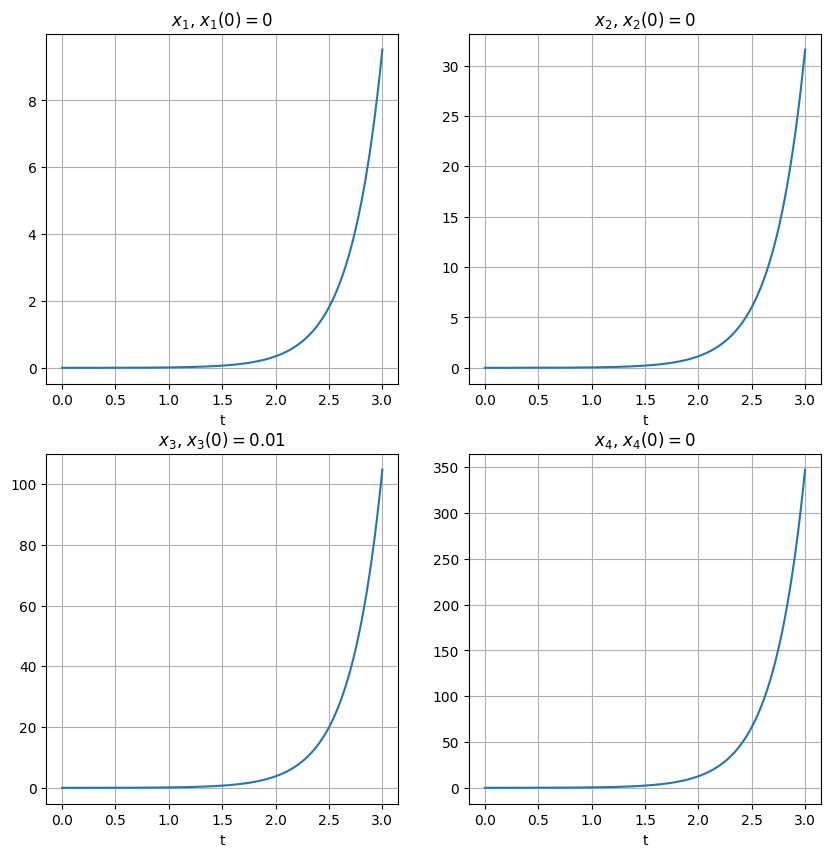

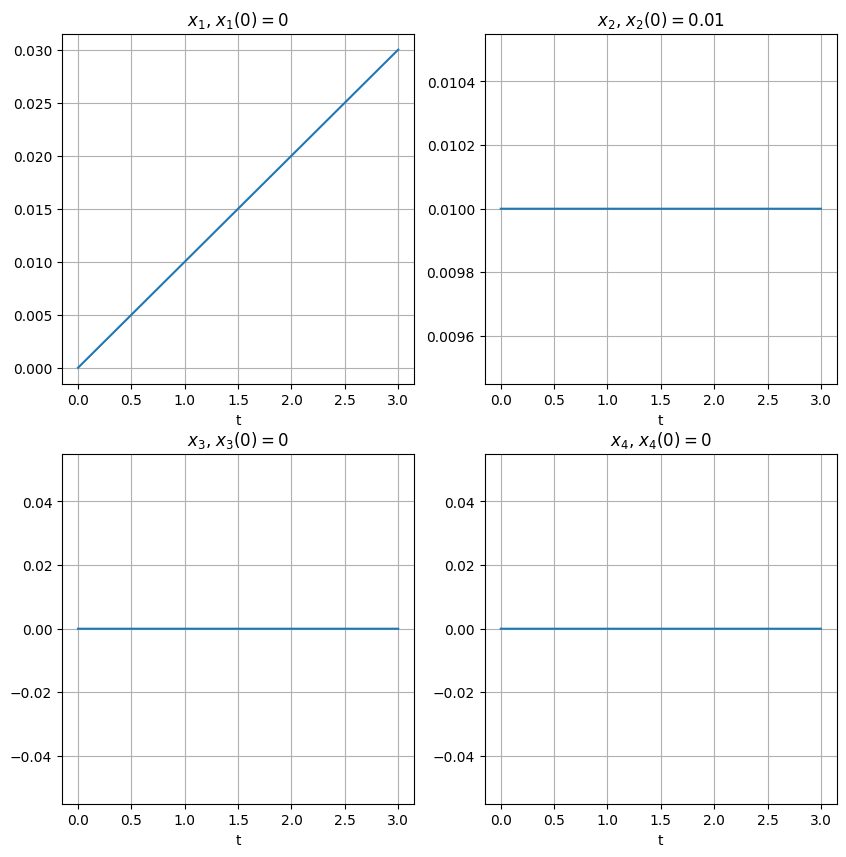

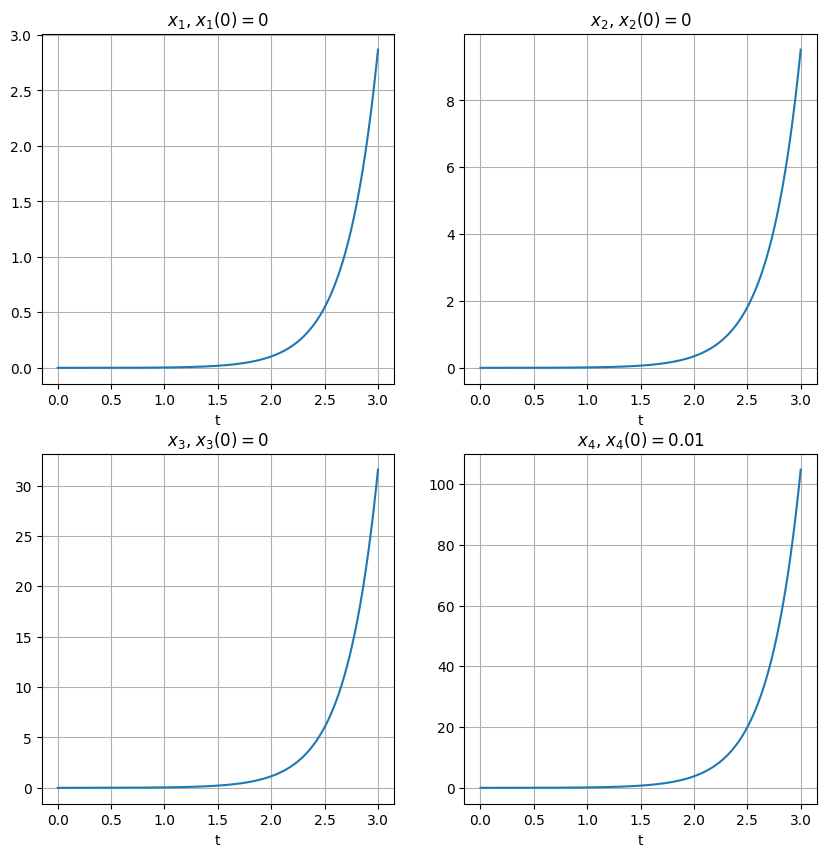

In [54]:
x0s = [[0, 0, 0.01, 0], [0, 0.01, 0, 0], [0, 0, 0, 0.01]]
ts = get_t(3)

for x0 in x0s:
    linear_initial_response(ss_u, x0, ts)

2.4

In [55]:
def non_linear_compare_initial_response(ss_lin, ss_non_lin, x0, ts):
    resp = control.initial_response(ss_lin, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i], label='lin') 
        ax[i//2, i%2].plot(ts, resp_non_lin.states[i], label='nonlin') 
        
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid() 
        ax[i//2, i%2].legend() 
        
        plt.savefig(f'{SAVE_PATH}/task2_4_{"_".join([str(x) for x in x0])}.jpg')

In [56]:
def up_func(t, x, u, params):
    ''' 
    u[0] -- u
    u[1] -- f
    '''
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])
ss_non_lin = control.NonlinearIOSystem(up_func)
ss_non_lin.set_inputs(2)

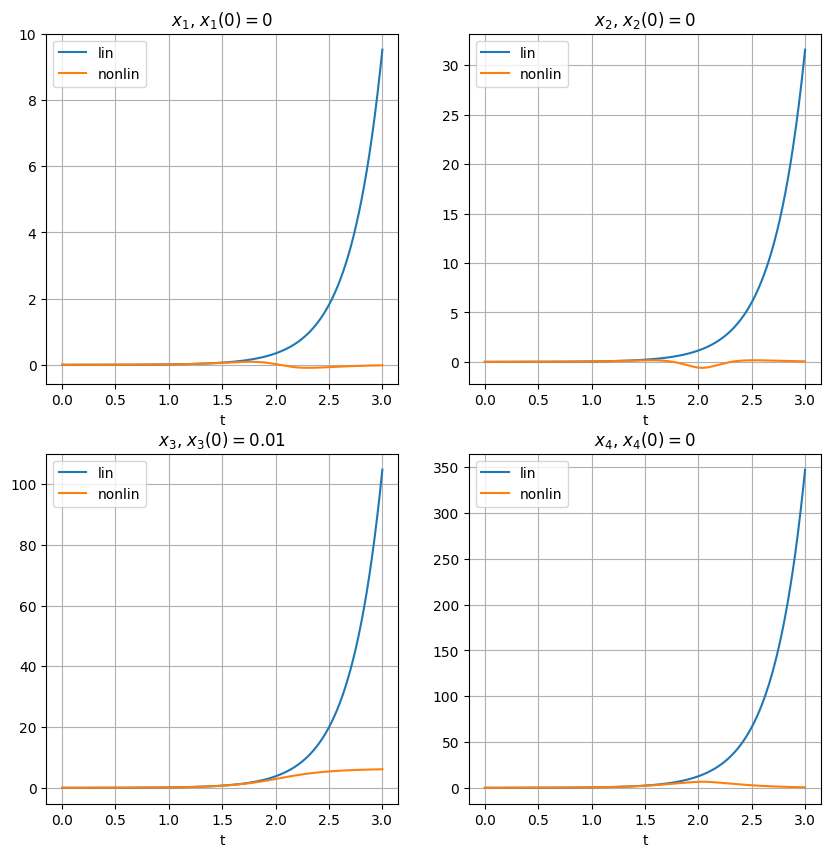

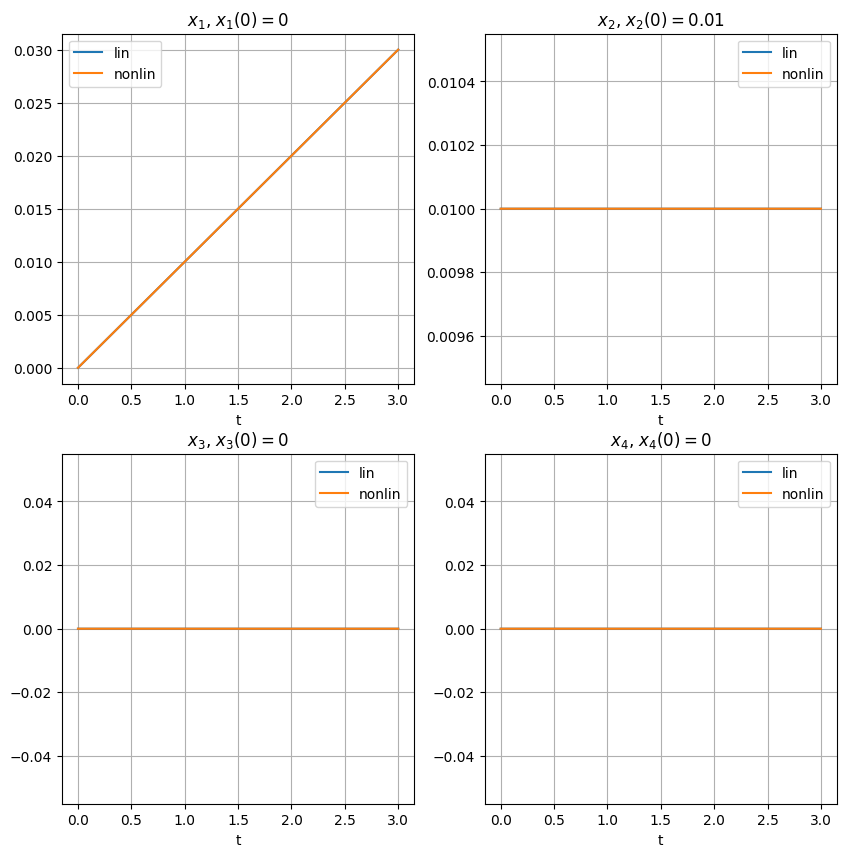

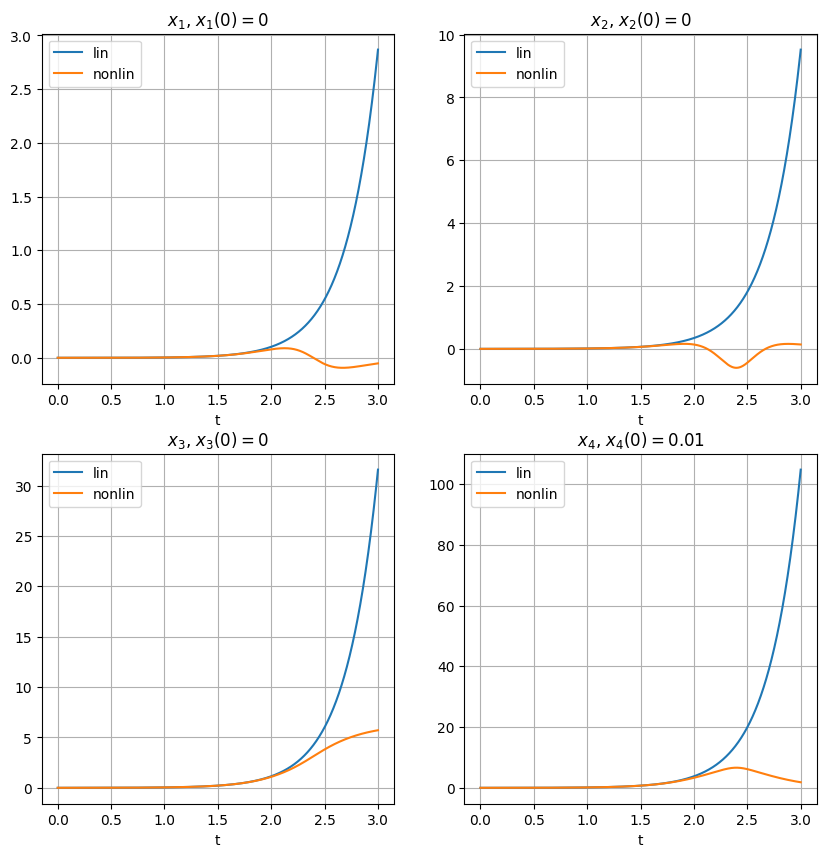

In [57]:
for x0 in x0s:
    non_linear_compare_initial_response(ss_u, ss_non_lin, x0, ts)

## Task3

3.1

In [58]:
def task3_get_K(A, B, G, Y):
    P= cvxpy.Variable(A.shape)
    objective = cvxpy.Minimize(cvxpy.sum_squares(A @ P - P @ G - B @ Y))
    prob = cvxpy.Problem(objective)
    print(f'Optimization error: {prob.solve()}, rankP = {np.linalg.matrix_rank(P.value)}')
    K = - Y @ np.linalg.pinv(P.value)
    print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')
    return K

def task1_simulate(A, B, K, x0, ts):
    print(f'spec(A + B@K): {np.linalg.eigvals(A + B@K)}')
    ss = control.ss(A + B@K, A*0, A*0, A*0)
    return control.forced_response(ss, X0=x0, T=ts)

In [59]:
G = np.diag([-1, -2, -3, -4])
Y = np.ones((B.shape[1], A.shape[0]))
K = task3_get_K(A, B, G, Y)

Optimization error: 2.675501878742748e-30, rankP = 4
\[K = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -4.00 & -3.00 & -2.00 & -1.00
\end{bmatrix}\]


In [60]:
def up_func(t, x, u, params):
    ''' 
    u[0] -- u
    u[1] -- f
    '''
    K = params.get('K', np.zeros((1, 4)))
    u[0] = (K @ x).reshape(-1)[0]
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])
    
ss_non_lin = control.NonlinearIOSystem(up_func, params={"K": K})
ss_non_lin.set_inputs(2)

In [61]:
def non_linear_compare_mod_control(ss_lin, ss_non_lin, x0, ts):
    resp = control.initial_response(ss_lin, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i], label='lin') 
        ax[i//2, i%2].plot(ts, resp_non_lin.states[i], label='nonlin') 
        
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid() 
        ax[i//2, i%2].legend() 
        
        plt.savefig(f'{SAVE_PATH}/task3_1_{"_".join([str(x) for x in x0])}.jpg')

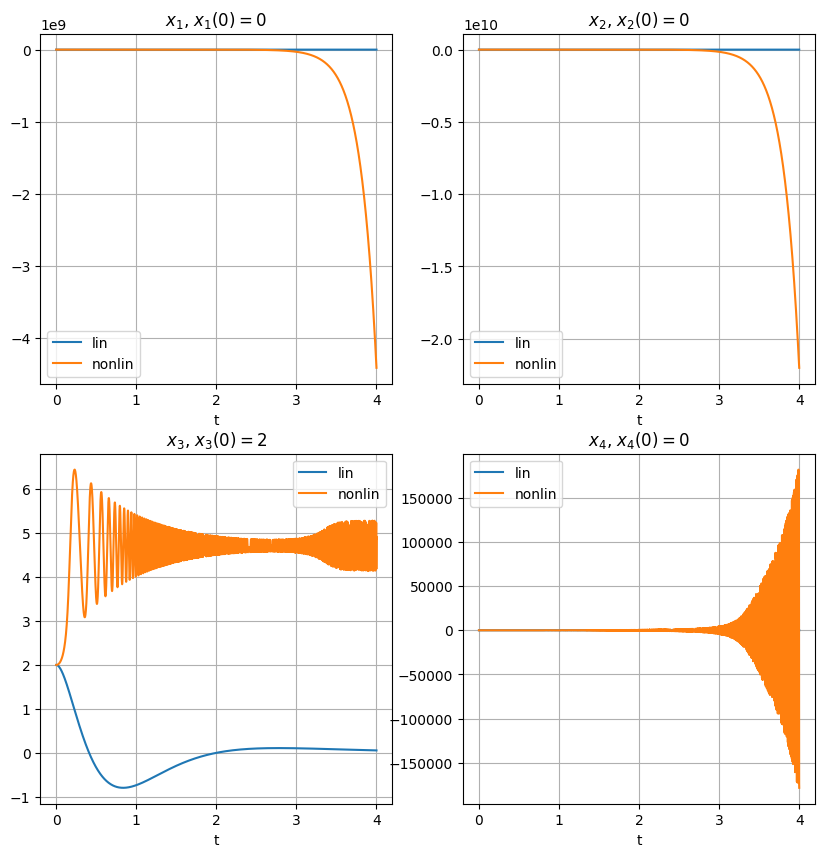

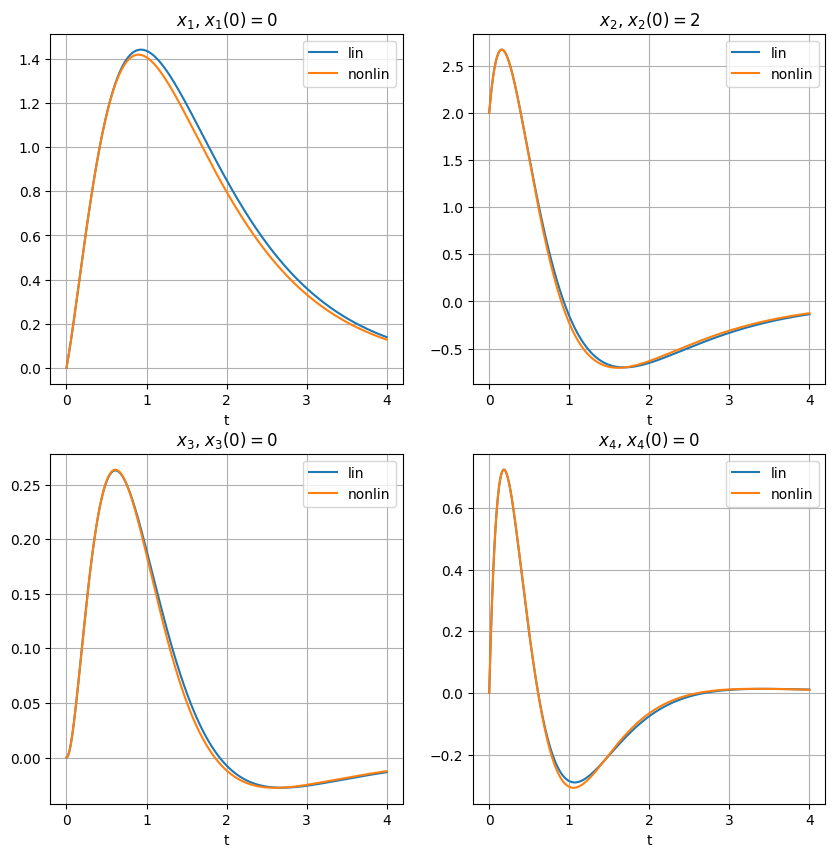

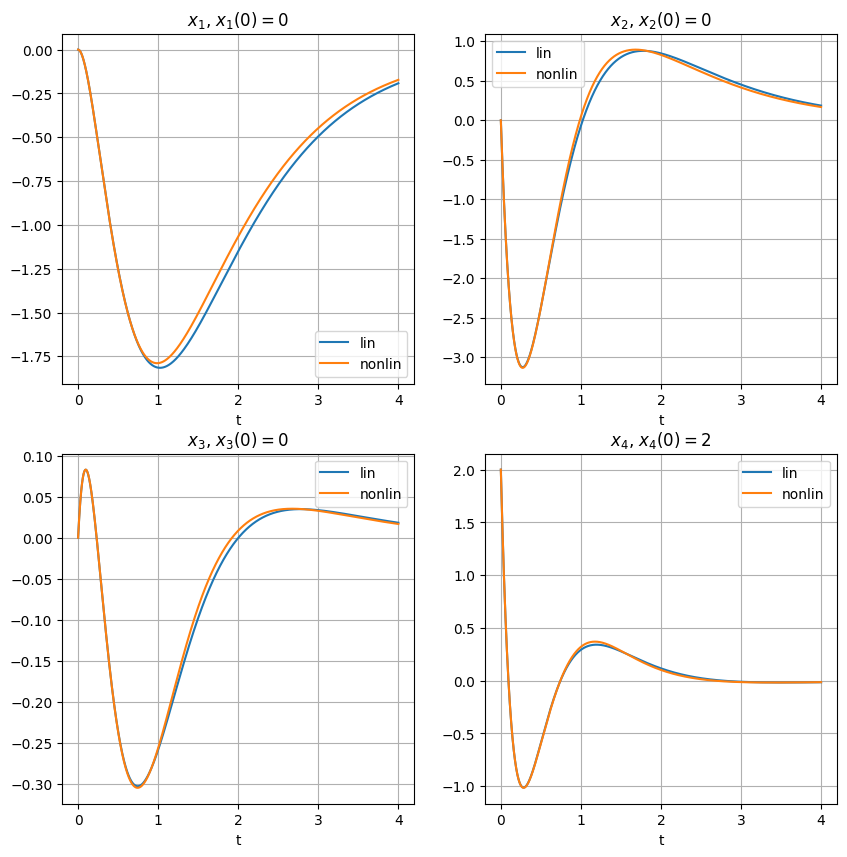

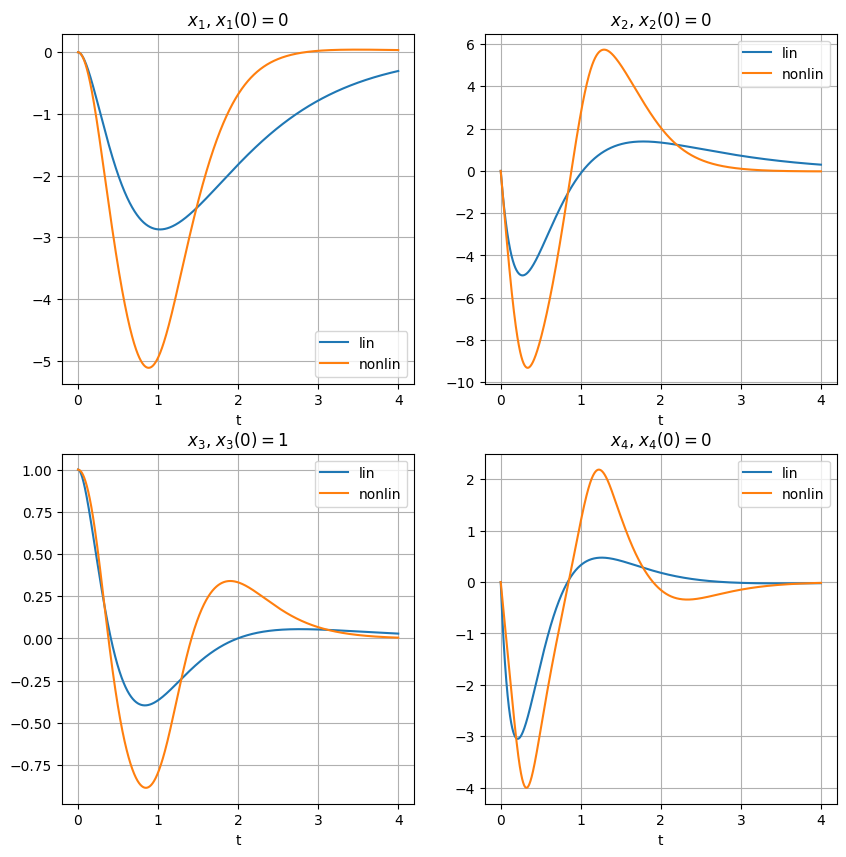

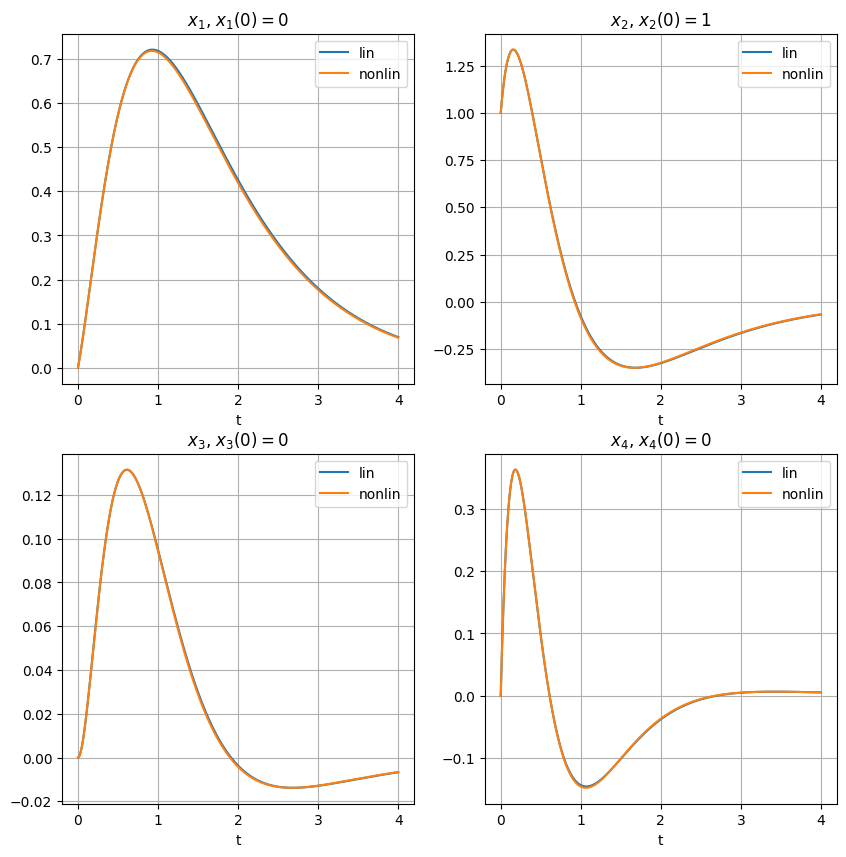

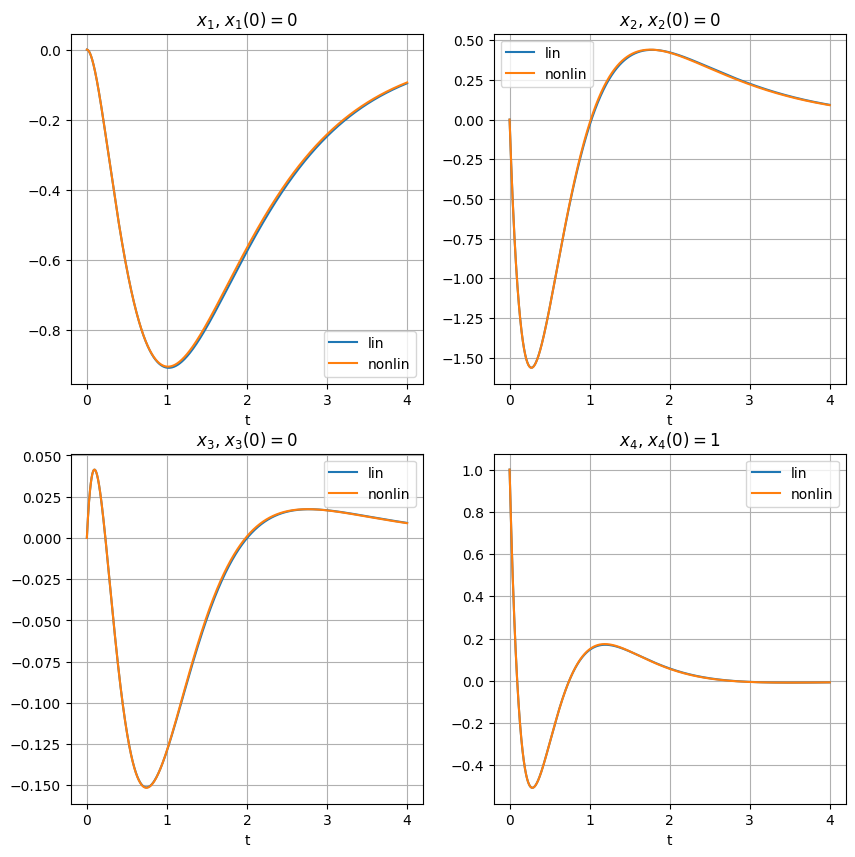

In [62]:
x0s = [[0, 0, 2, 0], [0, 2, 0, 0], [0, 0, 0, 2], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]]
ts = get_t(4)
ss_mod = control.ss(A + B @ K, np.zeros_like(A), np.zeros_like(A), np.zeros_like(A))
for x0 in x0s:
    non_linear_compare_mod_control(ss_mod, ss_non_lin, x0, ts)

3.2

In [63]:
def task32_get_K(A, B, G, Y):
    P= cvxpy.Variable(A.shape)
    objective = cvxpy.Minimize(cvxpy.sum_squares(A @ P - P @ G - B @ Y))
    prob = cvxpy.Problem(objective)
    err = prob.solve()
    assert err < 1, 'Not solved for K'
    K = - Y @ np.linalg.pinv(P.value)
    return K
Gs = [np.diag([-1, -2, -3, -4]), np.diag([-1, -2, -3, -4]) / 10, np.array([[-1, -1, 0, 0], [1, -1, 0, 0], [0, 0, -2, -2], [0, 0, 2, -2]])]

In [64]:
ts = get_t(4)
Y = np.ones((B.shape[1], A.shape[0]))
print('\\begin{center}\n    \\begin{tabular}{ c | c c c }')
print('$\sigma G$ & $\max x$ & $\max \\varphi$ & $\max u$ \\\\')
for G in Gs:
    K = task32_get_K(A, B, G, Y)
    x0 = [0, 0, 1, 0]
    ss_mod = control.ss(A + B @ K, np.zeros_like(A), np.zeros_like(A), np.zeros_like(A))
    ss_non_lin = control.NonlinearIOSystem(up_func, params={"K": K})
    ss_non_lin.set_inputs(2)
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    print(f'        ${a2l.to_ltx(np.linalg.eigvals(G), print_out=False)}$ & {round(np.abs(resp_non_lin.states[0]).max(), 1)} & {round(np.abs(resp_non_lin.states[3]).max(), 1)} & {round(np.abs(K @ resp_non_lin.states).max(), 1)} \\\\')
print("    \end{tabular}\n\end{center}")


\begin{center}
    \begin{tabular}{ c | c c c }
$\sigma G$ & $\max x$ & $\max \varphi$ & $\max u$ \\
        $\begin{bmatrix}
 -1.00 & -2.00 & -3.00 & -4.00
\end{bmatrix}$ & 5.1 & 4.0 & 48.4 \\
        $\begin{bmatrix}
 -0.10 & -0.20 & -0.30 & -0.40
\end{bmatrix}$ & 110.4 & 13.6 & 76.7 \\
        $\begin{bmatrix}
 -1.00 + 1.00j & -1.00 + -1.00j & -2.00 + 2.00j & -2.00 + -2.00j
\end{bmatrix}$ & 31482.2 & 194.8 & 256515.5 \\
    \end{tabular}
\end{center}


3.3

In [65]:
def task3_get_L(A, C, G, Y):
    Q = cvxpy.Variable(A.shape)
    objective = cvxpy.Minimize(cvxpy.sum_squares(G @ Q - Q @ A - Y @ C))
    prob = cvxpy.Problem(objective)
    assert prob.solve() < 1, 'Not solved'
    return np.linalg.pinv(Q.value) @ Y

def up_func_L(t, x, u, params):
    ''' 
    u[0] -- y_0
    u[1] -- y_1
    '''
    L = params.get('L', np.zeros((1, 4)))
    C = params.get('C', np.zeros((1, 4)))
    
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ]) + L @ (C@x - u)


In [66]:
Gs = [np.diag([-1, -2, -3, -4]), np.diag([-1, -2, -3, -4]) / 10, np.array([[-1, -1, 0, 0], [1, -1, 0, 0], [0, 0, -2, -2], [0, 0, 2, -2]])]

In [67]:
ts = get_t(10)
Y = np.ones((B.shape[1], A.shape[0]))
G = Gs[0]
K = task32_get_K(A, B, G, Y)
ss_non_lin = control.NonlinearIOSystem(up_func, params={"K": K})
ss_non_lin.set_inputs(2)

new_g = Gs[0]
new_y = np.ones((A.shape[0], C.shape[0]))
L = task3_get_L(A, C, new_g, new_y).astype(np.float64)
print(f'\[L = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[\Gamma = {a2l.to_ltx(new_g, print_out=False)}\]')
print(f'\[Y = {a2l.to_ltx(new_y, print_out=False)}\]')

ss_non_lin_obs = control.NonlinearIOSystem(up_func_L, params={"L": L, 'C': C})
ss_non_lin_obs.set_inputs(2)

\[L = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[\Gamma = \begin{bmatrix}
 -1.00 &  0.00 &  0.00 &  0.00\\
  0.00 & -2.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -3.00 &  0.00\\
  0.00 &  0.00 &  0.00 & -4.00
\end{bmatrix}\]
\[Y = \begin{bmatrix}
  1.00 &  1.00\\
  1.00 &  1.00\\
  1.00 &  1.00\\
  1.00 &  1.00
\end{bmatrix}\]


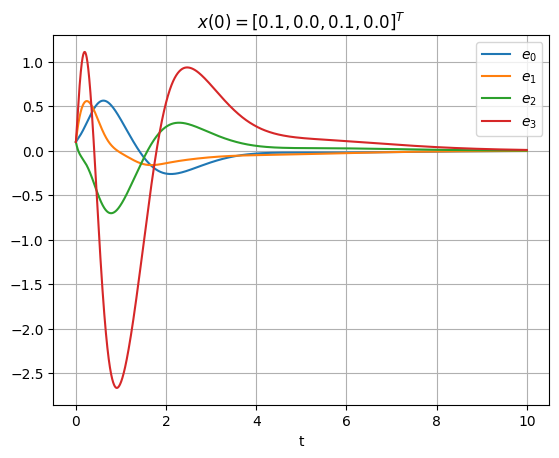

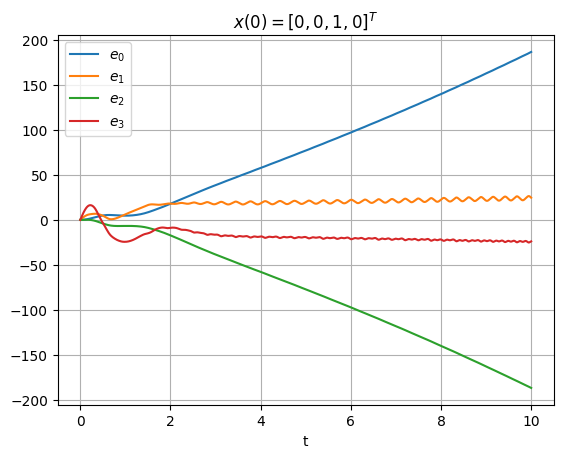

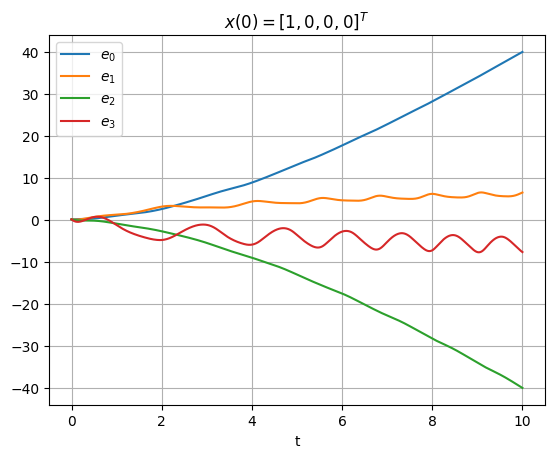

In [68]:
x0s = [[0.1, 0, 0.1, 0], [0, 0, 1, 0], [1, 0, 0, 0]]
for x0 in x0s:
    x0 = np.array(x0)
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    resp_non_lin_obs = control.input_output_response(ss_non_lin_obs, T=ts, X0=x0 + 0.1, U=C @ resp_non_lin.states)
    err = resp_non_lin_obs.states - resp_non_lin.states
    for i in range(4):
        plt.plot(ts, err[i], label=f'$e_{i}$') 
    plt.xlabel('t') 
    plt.legend() 
    plt.title(f'$x(0) = [{x0[0]}, {x0[1]}, {x0[2]}, {x0[3]}]^T$')
    plt.grid() 
    plt.savefig(f'{SAVE_PATH}/task3_3_{x0[0]}_{x0[2]}.jpg')
    plt.show()

3.4

In [69]:
x0 = np.array(x0s[0])
print(f'\[x(0) = {a2l.to_ltx(x0, print_out=False)}\]')
resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
for new_g in Gs:
    L = task3_get_L(A, C, new_g, new_y).astype(np.float64)
    print(f'\[L = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[\Gamma = {a2l.to_ltx(new_g, print_out=False)}\]')

    ss_non_lin_obs = control.NonlinearIOSystem(up_func_L, params={"L": L, 'C': C})
    ss_non_lin_obs.set_inputs(2)
    resp_non_lin_obs = control.input_output_response(ss_non_lin_obs, T=ts, X0=x0 + 0.1, U=C @ resp_non_lin.states)
    err = resp_non_lin_obs.states - resp_non_lin.states
    for i in range(4):
        plt.plot(ts, err[i], label=f'$e_{i}$') 
    plt.xlabel('t') 
    plt.grid() 
    plt.legend() 
    plt.title(f'$\sigma \Gamma = [{"; ".join([str(np.round(x, 1)) for x in np.linalg.eigvals(new_g)])}]$')
    plt.savefig(f'{SAVE_PATH}/task3_4_{"_".join([str(x) for x in np.linalg.eigvals(new_g)])}.jpg')
    plt.close()
    

\[x(0) = \begin{bmatrix}
  0.10 &  0.00 &  0.10 &  0.00
\end{bmatrix}\]
\[L = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[\Gamma = \begin{bmatrix}
 -1.00 &  0.00 &  0.00 &  0.00\\
  0.00 & -2.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -3.00 &  0.00\\
  0.00 &  0.00 &  0.00 & -4.00
\end{bmatrix}\]
\[L = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[\Gamma = \begin{bmatrix}
 -0.10 &  0.00 &  0.00 &  0.00\\
  0.00 & -0.20 &  0.00 &  0.00\\
  0.00 &  0.00 & -0.30 &  0.00\\
  0.00 &  0.00 &  0.00 & -0.40
\end{bmatrix}\]
\[L = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[\Gamma = \begin{bmatrix}
 -1.00 & -1.00 &  0.00 &  0.00\\
  1.00 & -1.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -2.00 & -2.00\\
  0.00 &  0.00 &  2.00 & -2.00
\end{bmatrix}\]


3.5

In [70]:
def up_func_K_L(t, x, u, params):
    ''' 
    x[:4] --  x
    x[4:] --  \hat{x}
    u -- trash
    '''
    L = params.get('L', np.zeros((1, 4)))
    K = params.get('K', np.zeros((1, 4)))
    C = params.get('C', np.zeros((1, 4)))
    
    u[0] = (K @ x[4:]).reshape(-1)[0]
    
    dxh =  np.array([
        x[4 + 1],
        1 / (M + m*np.sin(x[4 + 2])**2) * (-m*l*np.sin(x[4 + 2])*x[4 + 3]**2 + m*g*np.cos(x[4 + 2])*np.sin(x[4 + 2]) + u[0] + u[1]*np.cos(x[4 + 2])/l),
        x[4 + 3],
        1 / (M + m*np.sin(x[4 + 2])**2) * (-m*np.cos(x[4 + 2])*np.sin(x[4 + 2])*x[4 + 3]**2 + (M+m)*g*np.sin(x[4 + 2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[4 + 2])/l)
    ]) + L @ (C@x[4:] - C@x[:4])
    
    dx = np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])
    
    return np.hstack((dx, dxh))


In [71]:
new_y = np.ones((A.shape[0], C.shape[0]))
L = task3_get_L(A, C, Gs[0], new_y).astype(np.float64)
Y = np.ones((B.shape[1], A.shape[0]))
K = task32_get_K(A, B, Gs[0], Y)
x0 = np.array(x0s[0])
ss_non_lin = control.NonlinearIOSystem(up_func_K_L, params={"K": K, "L": L, 'C': C})
ss_non_lin.set_inputs(2)
resp_non_lin_by_output = control.input_output_response(ss_non_lin, T=ts, X0=np.hstack((x0, x0 + 0.1)), U=C @ resp_non_lin.states)
print(f'\[L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[\Gamma = {a2l.to_ltx(new_g, print_out=False)}\]')

\[L = \begin{bmatrix}
  3.33 &  3.33\\
 -1.83 & -1.83\\
 -13.33 & -13.33\\
 -44.17 & -44.17
\end{bmatrix}\]
\[K = \begin{bmatrix}
  2.40 &  5.00 & -48.40 & -15.00
\end{bmatrix}\]
\[\Gamma = \begin{bmatrix}
 -1.00 & -1.00 &  0.00 &  0.00\\
  1.00 & -1.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -2.00 & -2.00\\
  0.00 &  0.00 &  2.00 & -2.00
\end{bmatrix}\]


In [77]:
new_y = np.ones((A.shape[0], C.shape[0]))
L = task3_get_L(A, C, Gs[2], new_y).astype(np.float64)
Y = np.ones((B.shape[1], A.shape[0]))
K = task32_get_K(A, B, Gs[2], Y)
x0 = np.array(x0s[0])
ss_non_lin = control.NonlinearIOSystem(up_func_K_L, params={"K": K, "L": L, 'C': C})
ss_non_lin.set_inputs(2)
resp_non_lin_by_output1 = control.input_output_response(ss_non_lin, T=ts, X0=np.hstack((x0, x0 + 0.1)), U=C @ resp_non_lin.states)
print(f'\[L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[\Gamma = {a2l.to_ltx(new_g, print_out=False)}\]')

\[L = \begin{bmatrix}
  1.50 &  1.50\\
 -1.08 & -1.08\\
 -7.50 & -7.50\\
 -27.92 & -27.92
\end{bmatrix}\]
\[K = \begin{bmatrix}
  1.60 &  2.40 & -30.60 & -8.40
\end{bmatrix}\]
\[\Gamma = \begin{bmatrix}
 -1.00 & -1.00 &  0.00 &  0.00\\
  1.00 & -1.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -2.00 & -2.00\\
  0.00 &  0.00 &  2.00 & -2.00
\end{bmatrix}\]


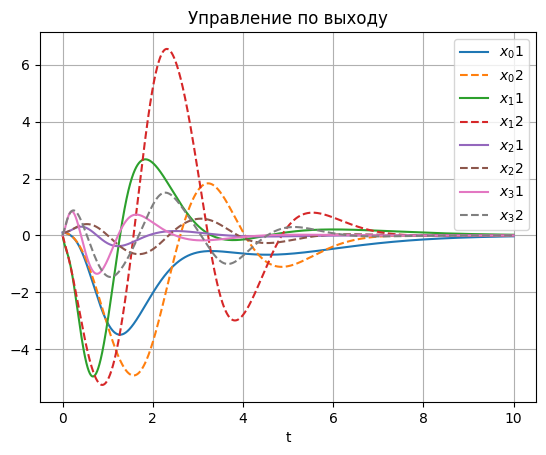

In [80]:
for i in range(4):
    plt.plot(ts, resp_non_lin_by_output.states[i], label=f'$x_{i} 1$') 
    plt.plot(ts, resp_non_lin_by_output1.states[i], '--', label=f'$x_{i} 2$') 
    
plt.xlabel('t') 
plt.grid() 
plt.legend() 
plt.title(f'Управление по выходу')
plt.savefig(f'{SAVE_PATH}/task3_5_new.jpg')

## Task4

In [81]:
def task4_get_K_LMI(a, b, alpha):
    P = cvxpy.Variable(a.shape,PSD=True)
    Y = cvxpy.Variable((b.shape[1],b.shape[0])) 
    prob = cvxpy.Problem(cvxpy.Maximize(0),[P >> np.eye(4), P@a.T + a@P + 2*alpha*P + Y.T @ b.T + b@Y << 0])
    prob.solve()
    # print(P.value, Y.value)
    return Y.value @ np.linalg.inv(P.value) 

def task4_get_K_LMI_mu(a, b, alpha, x0, mu=None):
    P = cvxpy.Variable(a.shape,PSD=True)
    Y = cvxpy.Variable((b.shape[1],b.shape[0])) 
    if mu is None:
        mu_ = cvxpy.Variable((1,1))
    else:
        mu_ = mu
    sub1 = cvxpy.bmat([
        [P, x0],
        [x0.T, [[1]]]
    ])
    if mu is None:
        sub2 = cvxpy.bmat([
            [P, Y.T],
            [Y, mu_]
        ])
    else:
        sub2 = cvxpy.bmat([
            [P, Y.T],
            [Y, [[mu_*mu_]]]
        ])
    prob = cvxpy.Problem(cvxpy.Maximize(0) if mu is not None else cvxpy.Minimize(mu_),
                      [P >> np.eye(4), 
                       P@a.T + a@P + 2*alpha*P + Y.T @ b.T + b@Y << 0,
                       sub1 >> 0, sub2 >> 0])
    res = prob.solve(solver="CLARABEL")
    # print(P.value, Y.value)
    return Y.value @ np.linalg.inv(P.value), np.sqrt(res)

def task4_get_L_LMI(a, c, alpha):
    Q = cvxpy.Variable(a.shape,PSD=True)
    Y = cvxpy.Variable((c.shape[1],c.shape[0])) 
    prob = cvxpy.Problem(cvxpy.Maximize(0),[Q >> np.eye(4), 
                                      a.T@Q + Q@A + 2*alpha*Q + c.T@Y.T + Y@c << 0])
    prob.solve()
    # print(Q.value, Y.value)
    return np.linalg.inv(Q.value) @ Y.value

In [82]:
alpha = 1
K = task4_get_K_LMI(A, B, alpha)
print(f'\[\\alpha = {alpha}\]')
print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')

\[\alpha = 1\]
\[K = \begin{bmatrix}
  8.51 &  10.41 & -70.15 & -15.94
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -1.58 + 6.21j & -1.58 + -6.21j & -1.19 + 0.81j & -1.19 + -0.81j
\end{bmatrix}\]


In [83]:
def up_func(t, x, u, params):
    ''' 
    u[0] -- u
    u[1] -- f
    '''
    K = params.get('K', np.zeros((1, 4)))
    u[0] = (K @ x).reshape(-1)[0]
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])

In [84]:
def task4_1_non_linear_compare_mod_control(ss_lin, ss_non_lin, x0, ts):
    resp = control.initial_response(ss_lin, T=ts, X0=x0)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp.states[i], label='lin') 
        ax[i//2, i%2].plot(ts, resp_non_lin.states[i], "--", label='nonlin') 
        
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid(True) 
        ax[i//2, i%2].legend() 
        
        plt.savefig(f'{SAVE_PATH}/task4_1_{"_".join([str(x) for x in x0])}.jpg')

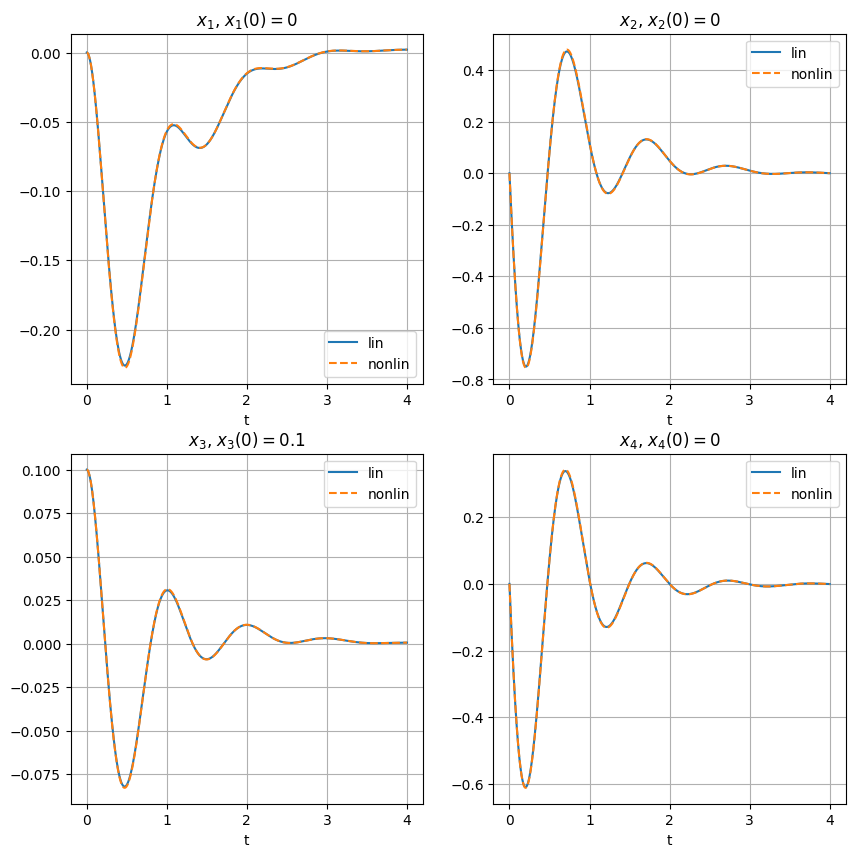

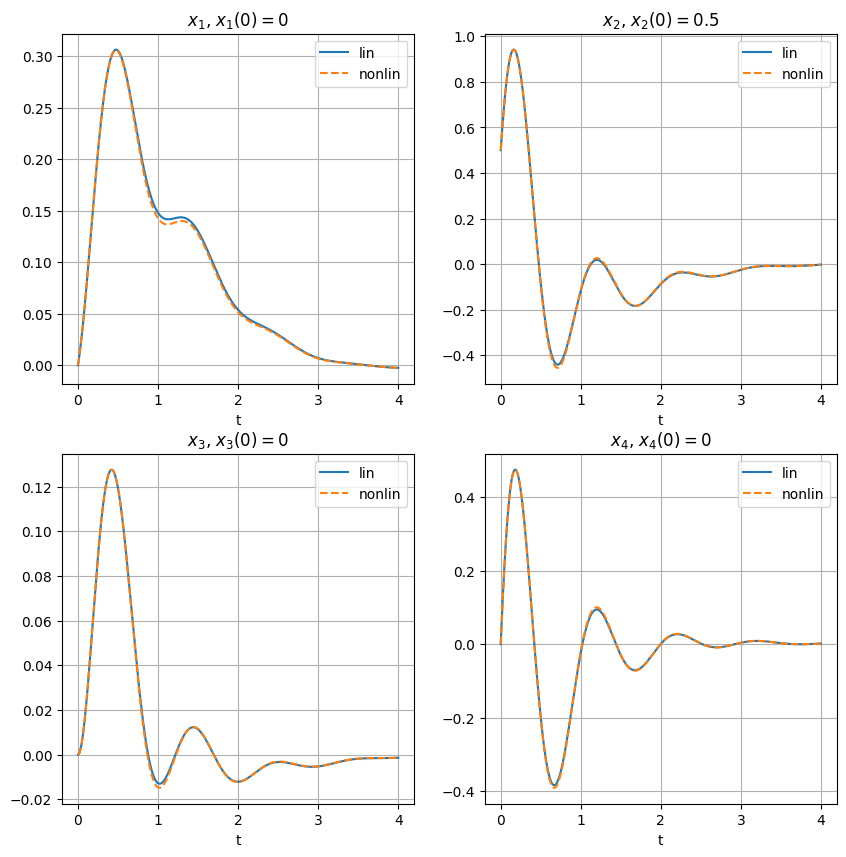

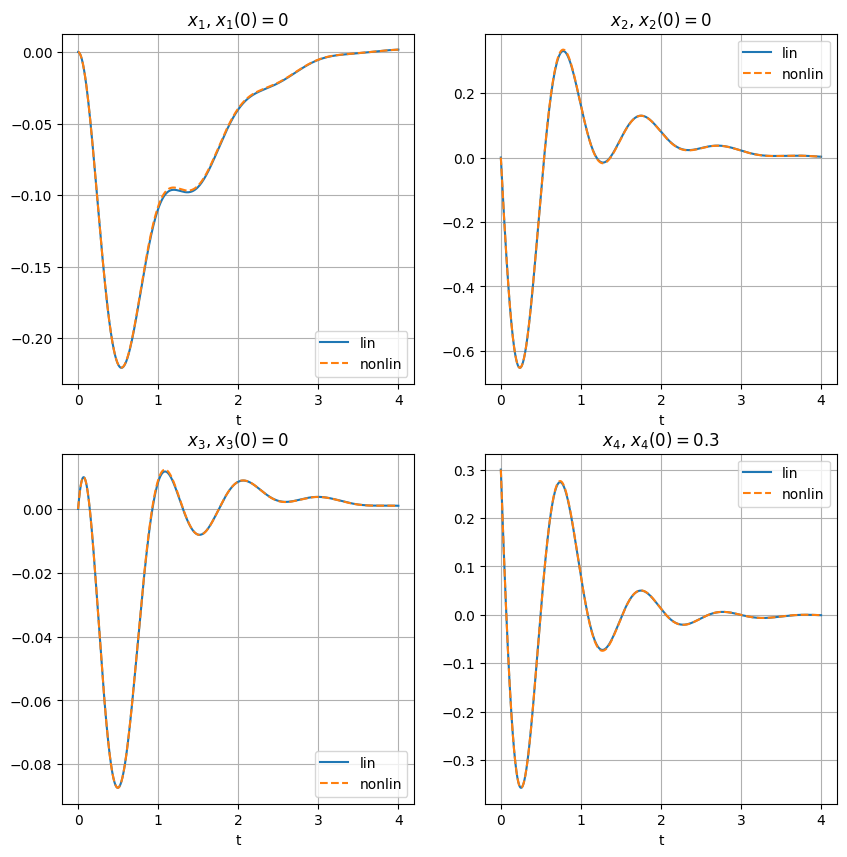

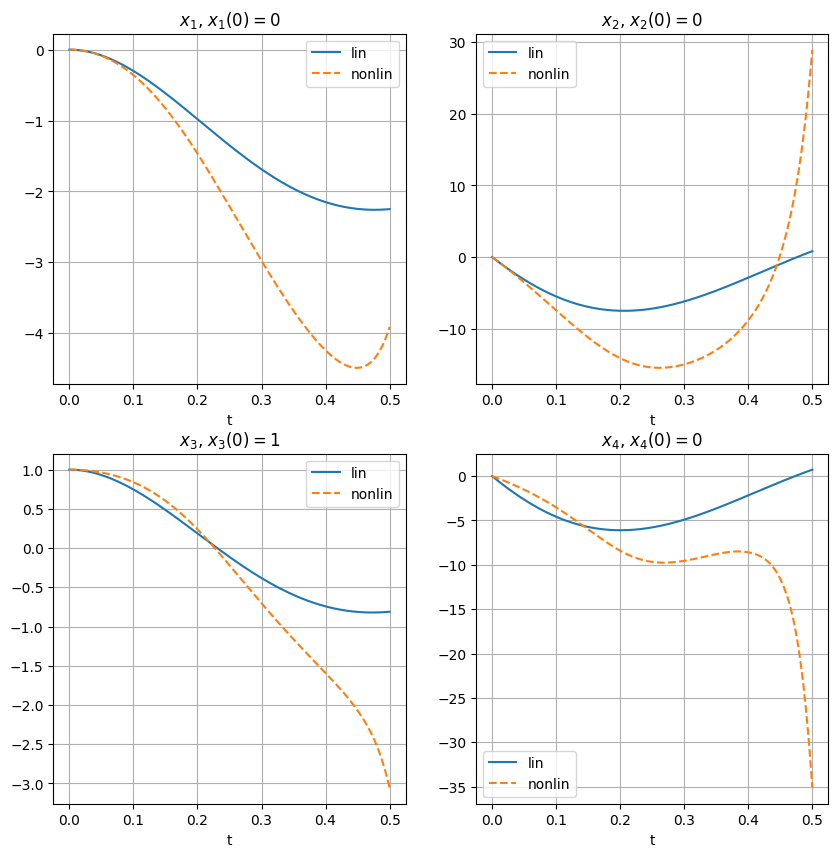

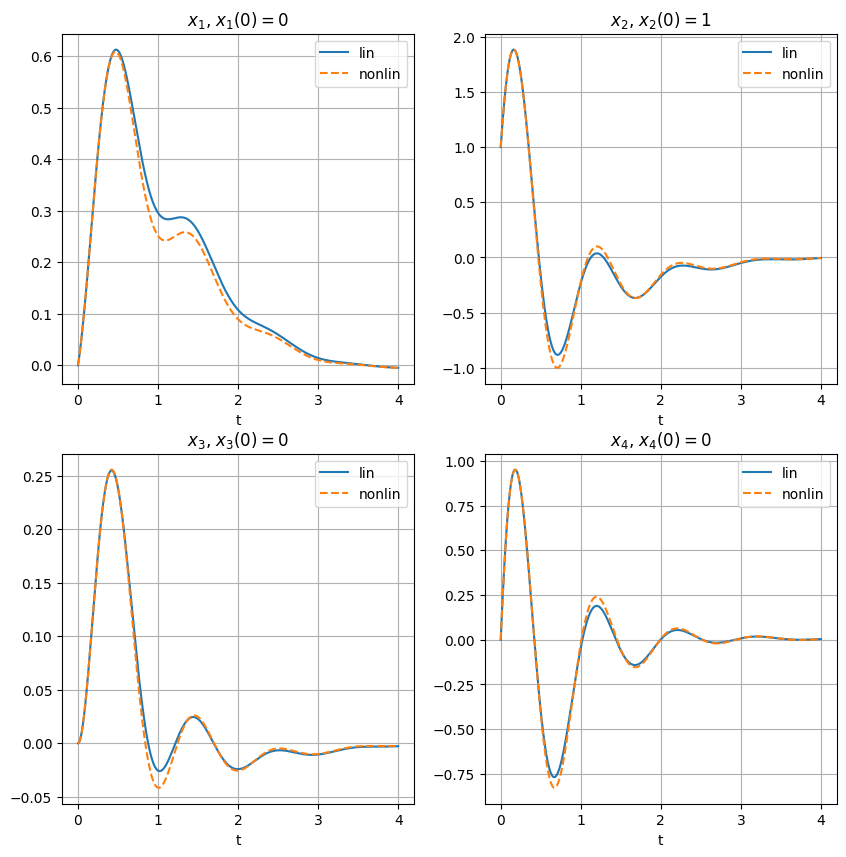

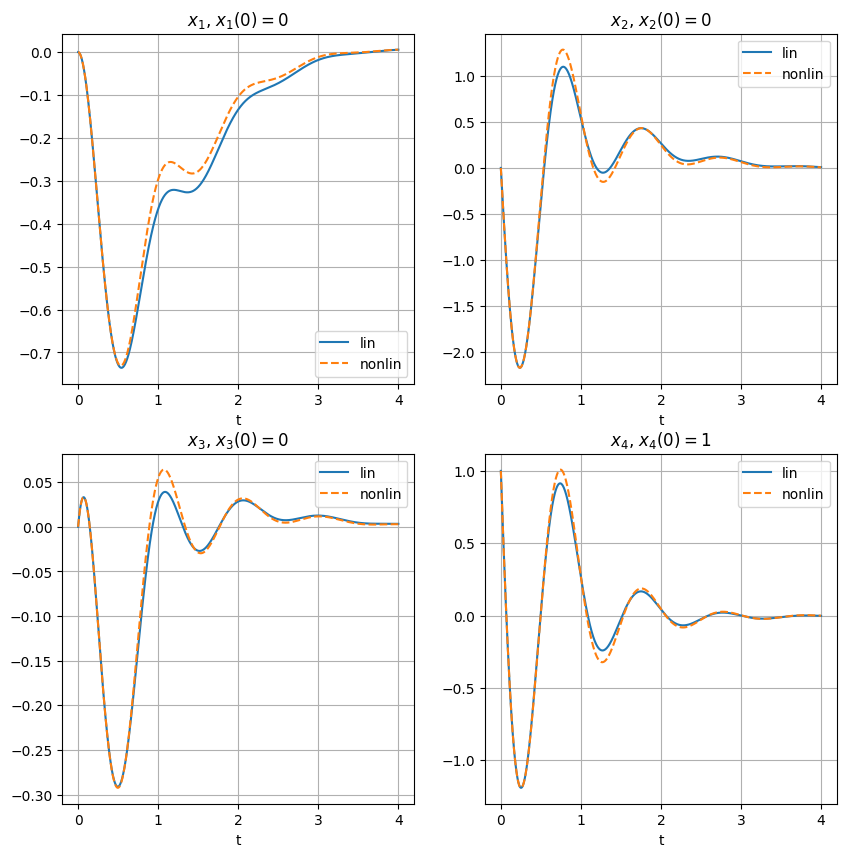

In [85]:
x0s = [
    [0, 0, 0.1, 0], [0, 0.5, 0, 0], [0, 0, 0, 0.3],
    [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]
]

    
ss_non_lin_4_1 = control.NonlinearIOSystem(up_func, params={"K": K})
ss_non_lin_4_1.set_inputs(2)
ts = get_t(4)
ss_mod = control.ss(A + B @ K, np.zeros_like(A), np.zeros_like(A), np.zeros_like(A))
for i, x0 in enumerate(x0s):
    if i == 3:
        ts = get_t(0.5)
    else:
        ts = get_t(4)
    task4_1_non_linear_compare_mod_control(ss_mod, ss_non_lin_4_1, x0, ts)

4.2

In [86]:
def task4_2_non_linear_compare_alphas_control(x0, ts):
    alphas = [0.1, 0.8, 1.5]
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    us = []
    for alpha in alphas:
        K = task4_get_K_LMI(A, B, alpha)
        # print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
        # print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')
        ss_non_lin_4_2 = control.NonlinearIOSystem(up_func, params={"K": K})
        ss_non_lin_4_2.set_inputs(2)
        resp_non_lin = control.input_output_response(ss_non_lin_4_2, T=ts, X0=x0, U=np.zeros((2, len(ts))))
        us.append((K@resp_non_lin.states).reshape(-1))
        for i in range(4):
            ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
            ax[i//2, i%2].plot(ts, resp_non_lin.states[i], label=f"$\\alpha={alpha}$") 
            ax[i//2, i%2].set_xlabel('t') 
            ax[i//2, i%2].grid(True) 
            ax[i//2, i%2].legend() 
        
        print(f'        ${alpha}$ & {round(np.abs(resp_non_lin.states[0]).max(), 2)} & {round(np.abs(resp_non_lin.states[2]).max(), 2)} & {round(np.abs(K @ resp_non_lin.states).max(), 1)} \\\\')
    plt.savefig(f'{SAVE_PATH}/task4_2_{"_".join([str(x) for x in x0])}.jpg')
    plt.close()
    
    plt.title(f"$u(t)$, $x_0=${x0}")
    plt.plot(ts, us[0], label=f"$\\alpha={alphas[0]}$")
    plt.plot(ts, us[1], label=f"$\\alpha={alphas[1]}$")
    plt.plot(ts, us[2], label=f"$\\alpha={alphas[2]}$")
    plt.legend()
    plt.savefig(f'{SAVE_PATH}/task4_2_u_{"_".join([str(x) for x in x0])}.jpg')
    plt.close()

In [88]:
x0s = [
    [0, 0, 0.1, 0], [0, 0, 0.5, 0], [0, 0, 1, 0]
]
x0s = [
    [0, 0, 0.1, 0]
]
ts = get_t(6,0.005)
print('\\begin{center}\n    \\begin{tabular}{ c | c c c }')
print('$\\alpha$ & $\max x$ & $\max \\varphi$ & $\max u$ \\\\')
for i, x0 in enumerate(x0s):
    if i == 2:
        ts = get_t(1,0.001)
    task4_2_non_linear_compare_alphas_control(x0, ts)
print("    \end{tabular}\n\end{center}")

\begin{center}
    \begin{tabular}{ c | c c c }
$\alpha$ & $\max x$ & $\max \varphi$ & $\max u$ \\
        $0.1$ & 0.27 & 0.1 & 3.7 \\
        $0.8$ & 0.24 & 0.1 & 5.7 \\
        $1.5$ & 0.21 & 0.1 & 11.6 \\
    \end{tabular}
\end{center}


4.3

In [89]:
def task4_3_non_linear_compare_alphas_control(alpha, ts):
    x0 = np.array([0, 0, 0.5, 0])
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    K, mu = task4_get_K_LMI_mu(A, B, alpha,x0.reshape((4,1)))
    print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')
    ss_non_lin_4_3 = control.NonlinearIOSystem(up_func, params={"K": K})
    ss_non_lin_4_3.set_inputs(2)
    
    ss_lin = control.ss(A + B @ K, np.zeros_like(A), np.zeros_like(A), np.zeros_like(A))
    
    resp = control.initial_response(ss_lin, T=ts, X0=x0)
    resp_non_lin = control.input_output_response(ss_non_lin_4_3, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    fig.suptitle(f"$\\alpha={alpha}$")
    for i in range(4):
        ax[i//2, i%2].set_title(f"$x_{i+1}$, $x_{i+1}(0) = {x0[i]}$")
        ax[i//2, i%2].plot(ts, resp_non_lin.states[i],label="nonlin") 
        ax[i//2, i%2].plot(ts, resp.states[i],label="linear") 
        
        ax[i//2, i%2].set_xlabel('t') 
        ax[i//2, i%2].grid(True) 
        ax[i//2, i%2].legend() 
            
    plt.savefig(f'{SAVE_PATH}/task4_3_{alpha}.jpg')
    plt.show()
    
    plt.clf()
    plt.title(f"$u(t)$, $x_0=${x0}, $\\alpha={alpha}$")
    plt.plot(ts, (K@resp_non_lin.states).reshape(-1), label="nonlin")
    plt.plot(ts, (K@resp.states).reshape(-1), label="linear")
    plt.legend()
    plt.savefig(f'{SAVE_PATH}/task4_3_u_{alpha}.jpg')

\[K = \begin{bmatrix}
  0.02 &  0.17 & -12.52 & -3.79
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -3.32 + 0.00j & -0.10 + 0.69j & -0.10 + -0.69j & -0.10 + 0.00j
\end{bmatrix}\]


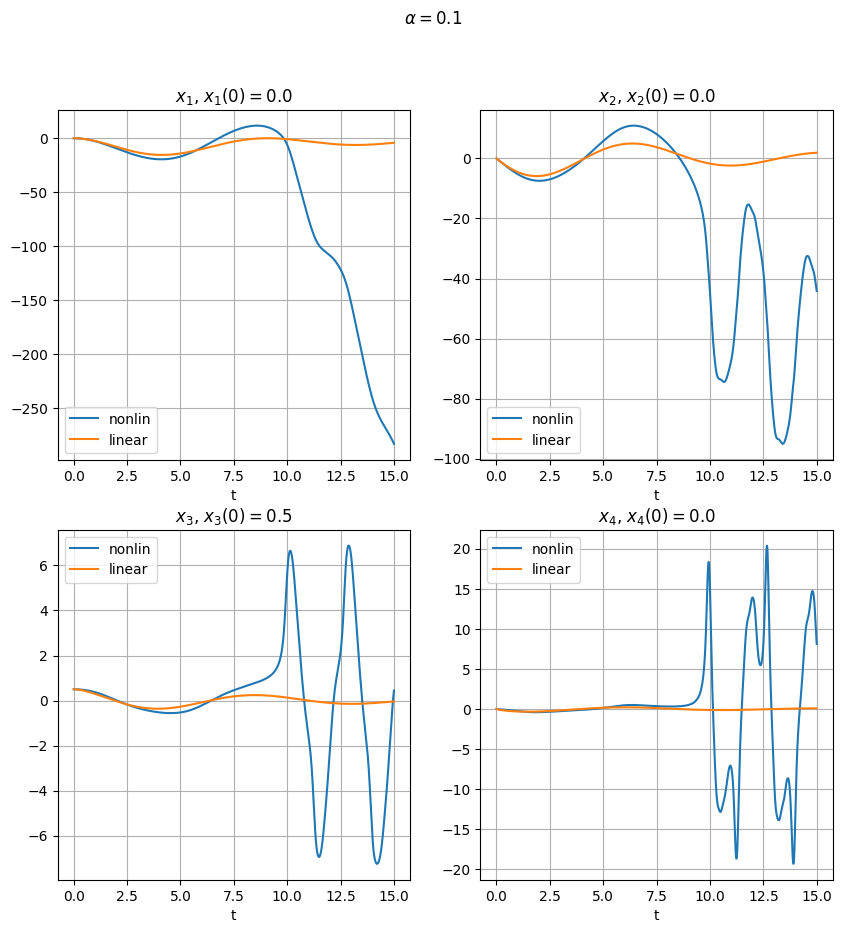

\[K = \begin{bmatrix}
  0.48 &  1.27 & -19.84 & -6.08
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -3.32 + 0.00j & -0.50 + 1.62j & -0.50 + -1.62j & -0.50 + 0.00j
\end{bmatrix}\]


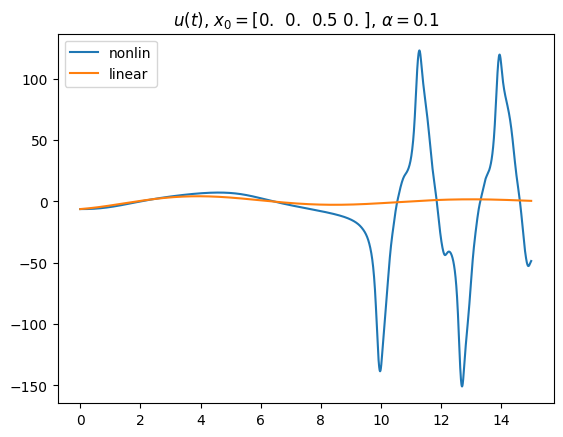

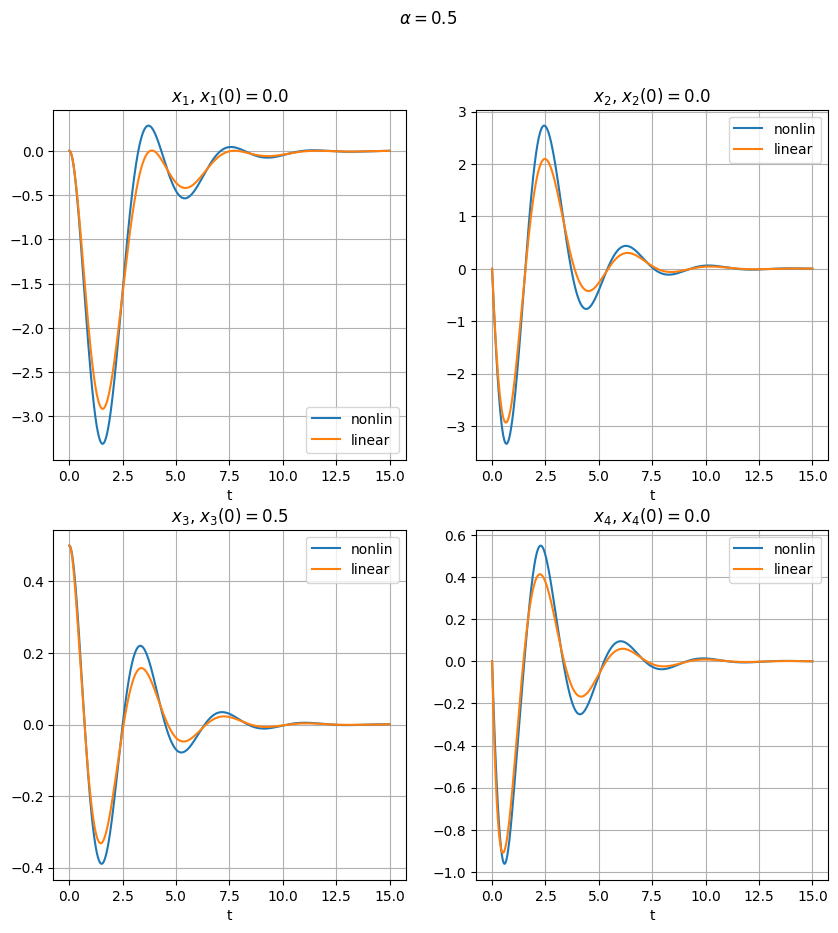

\[K = \begin{bmatrix}
  2.28 &  3.63 & -32.12 & -9.95
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -1.00 + 2.43j & -1.00 + -2.43j & -3.31 + 0.00j & -1.00 + 0.00j
\end{bmatrix}\]


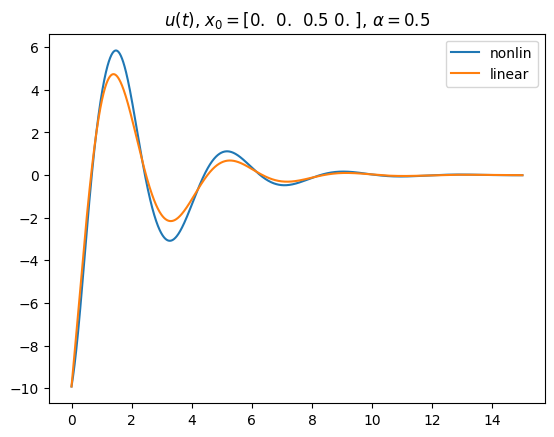

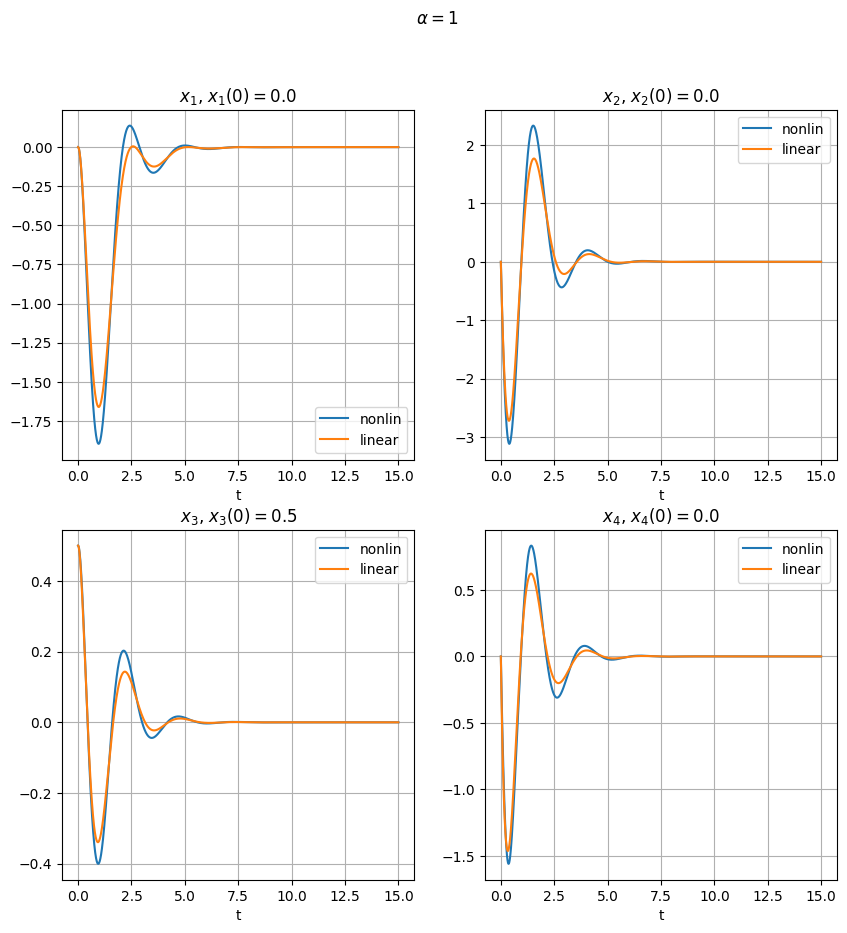

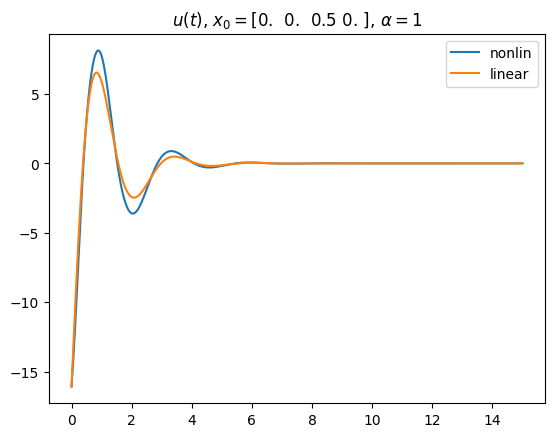

In [90]:
alphas = [
    0.1, 0.5, 1
]
ts = get_t(15,0.005)
for i, alpha in enumerate(alphas):
    # if i == 2:
    #     ts = get_t(1,0.001)
    task4_3_non_linear_compare_alphas_control(alpha, ts)

4.4

In [91]:
alpha = 1
print(f'\[ \\alpha = {alpha}\]')

L = task4_get_L_LMI(A, C, alpha)
print(f'\[L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[spec(A + LC) = {a2l.to_ltx(np.linalg.eigvals(A + L @ C), print_out=False)}\]')

K = task4_get_K_LMI(A, B, 1)
print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')

ts = get_t(10)
ss_non_lin = control.NonlinearIOSystem(up_func, params={"K": K})
ss_non_lin.set_inputs(2)

ss_non_lin_obs = control.NonlinearIOSystem(up_func_L, params={"L": L, 'C': C})
ss_non_lin_obs.set_inputs(2)

x0s = [[0.1, 0, 0.1, 0], [0, 0, 0.5, 0], [1, 0, 0, 0]]
for x0 in x0s:
    x0 = np.array(x0)
    resp_non_lin = control.input_output_response(ss_non_lin, T=ts, X0=x0, U=np.zeros((2, len(ts))))
    resp_non_lin_obs = control.input_output_response(ss_non_lin_obs, T=ts, X0=x0 + 0.1, U=C @ resp_non_lin.states)
    err = resp_non_lin_obs.states - resp_non_lin.states
    for i in range(4):
        plt.plot(ts, err[i], label=f'$e_{i}$') 
        plt.xlabel('t') 
        plt.grid() 
        plt.legend() 
        plt.title(f'$y(0) = [{x0[0]}, {x0[2]}]^T$')
        plt.savefig(f'{SAVE_PATH}/task4_4_{x0[0]}_{x0[2]}.jpg')
    plt.close()

\[ \alpha = 1\]
\[L = \begin{bmatrix}
 -4.48 & -0.63\\
 -8.92 & -2.11\\
  0.63 & -4.48\\
  1.11 & -19.92
\end{bmatrix}\]
\[spec(A + LC) = \begin{bmatrix}
 -2.31 + 2.32j & -2.31 + -2.32j & -2.17 + 1.69j & -2.17 + -1.69j
\end{bmatrix}\]
\[K = \begin{bmatrix}
  8.51 &  10.41 & -70.15 & -15.94
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -1.58 + 6.21j & -1.58 + -6.21j & -1.19 + 0.81j & -1.19 + -0.81j
\end{bmatrix}\]


4.5

\[K = \begin{bmatrix}
  148.44 &  90.81 & -348.09 & -106.21
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -4.30 + 9.96j & -4.30 + -9.96j & -3.40 + 1.03j & -3.40 + -1.03j
\end{bmatrix}\]
\[L = \begin{bmatrix}
 -1.31 & -0.30\\
 -1.94 & -1.21\\
  0.30 & -1.31\\
  0.21 & -12.94
\end{bmatrix}\]
\[spec(A + L C) = \begin{bmatrix}
 -0.65 + 1.39j & -0.65 + -1.39j & -0.66 + 1.09j & -0.66 + -1.09j
\end{bmatrix}\]
\[K = \begin{bmatrix}
  2.48 &  3.81 & -43.98 & -6.96
\end{bmatrix}\]
\[spec(A + B K) = \begin{bmatrix}
 -0.90 + 5.13j & -0.90 + -5.13j & -0.67 + 0.68j & -0.67 + -0.68j
\end{bmatrix}\]
\[L = \begin{bmatrix}
 -11.59 & -0.29\\
 -53.46 & -2.33\\
  0.29 & -11.59\\
  1.33 & -64.46
\end{bmatrix}\]
\[spec(A + L C) = \begin{bmatrix}
 -5.84 + 4.61j & -5.84 + -4.61j & -5.75 + 4.31j & -5.75 + -4.31j
\end{bmatrix}\]


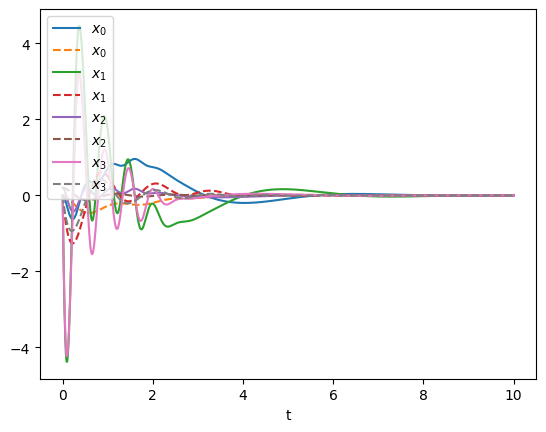

In [98]:
L = task4_get_L_LMI(A, C, 0.5).astype(np.float64)
K = task4_get_K_LMI(A, B, 3)
print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')
print(f'\[L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[spec(A + L C) = {a2l.to_ltx(np.linalg.eigvals(A + L@C), print_out=False)}\]')

x0 = np.array([0, 0, 0.2, 0])
ss_non_lin = control.NonlinearIOSystem(up_func_K_L, params={"K": K, "L": L, 'C': C})
ss_non_lin.set_inputs(2)
resp_non_lin_by_output = control.input_output_response(ss_non_lin, T=ts, X0=np.hstack((x0, x0 + 0.1)), U=np.zeros((2, len(ts))))


L = task4_get_L_LMI(A, C, 3).astype(np.float64)
K = task4_get_K_LMI(A, B, 0.5)
print(f'\[K = {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[spec(A + B K) = {a2l.to_ltx(np.linalg.eigvals(A + B @ K), print_out=False)}\]')
print(f'\[L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[spec(A + L C) = {a2l.to_ltx(np.linalg.eigvals(A + L@C), print_out=False)}\]')
ss_non_lin = control.NonlinearIOSystem(up_func_K_L, params={"K": K, "L": L, 'C': C})
ss_non_lin.set_inputs(2)
resp_non_lin_by_output1 = control.input_output_response(ss_non_lin, T=ts, X0=np.hstack((x0, x0 + 0.1)), U=np.zeros((2, len(ts))))

for i in range(4):
    plt.plot(ts, resp_non_lin_by_output.states[i], label=f'$x_{i}$') 
    plt.plot(ts, resp_non_lin_by_output1.states[i], '--', label=f'$x_{i}$') 
plt.xlabel('t') 
plt.legend() 
plt.savefig(f'{SAVE_PATH}/task4_5_new.jpg')

## Task5

5.2

\[Q = 0.1; R = 10.0; K_0 = \begin{bmatrix}
 -0.10 & -0.54 &  25.09 &  7.61
\end{bmatrix}\]
\[eig(A+BK_0) = \begin{bmatrix}
 -0.22 + 0.21j & -0.22 + -0.21j & -3.37 + 0.00j & -3.27 + 0.00j
\end{bmatrix}\]
\[Q = 1.0; R = 1.0; K_1 = \begin{bmatrix}
 -1.00 & -2.40 &  34.91 &  10.76
\end{bmatrix}\]
\[eig(A+BK_1) = \begin{bmatrix}
 -3.86 + 0.00j & -2.87 + 0.00j & -0.81 + 0.50j & -0.81 + -0.50j
\end{bmatrix}\]
\[Q = 10.0; R = 0.1; K_2 = \begin{bmatrix}
 -10.00 & -17.70 &  117.61 &  38.08
\end{bmatrix}\]
\[eig(A+BK_2) = \begin{bmatrix}
 -14.54 + 0.00j & -2.42 + 1.00j & -2.42 + -1.00j & -1.01 + 0.00j
\end{bmatrix}\]


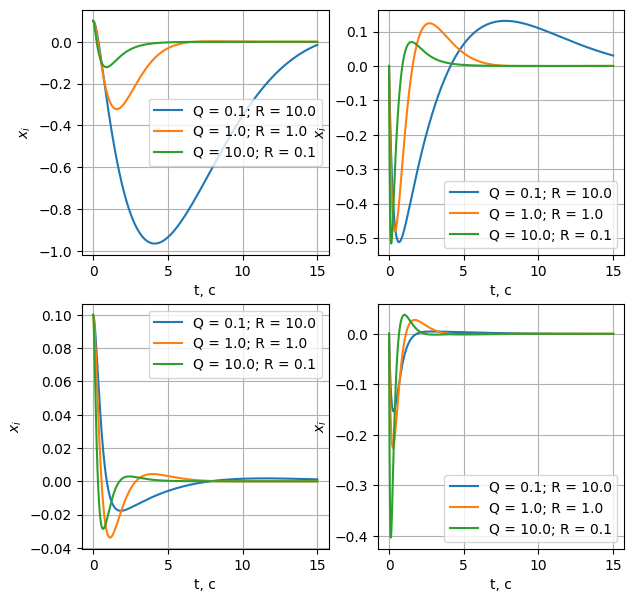

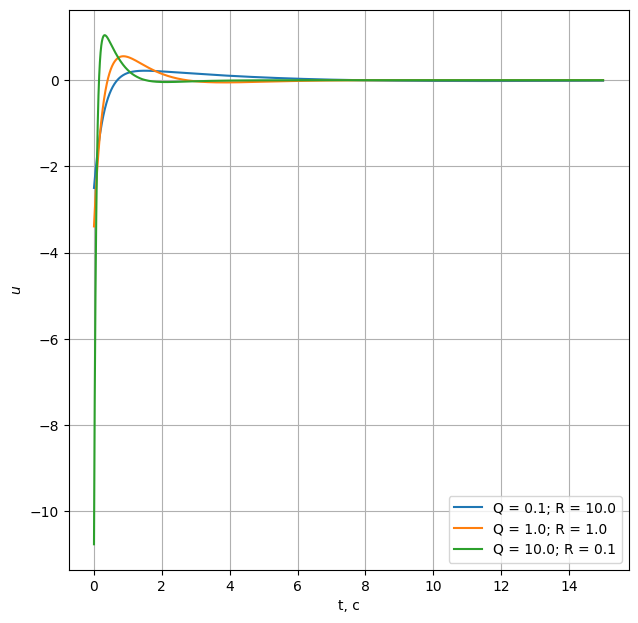

In [ ]:
x0 = [0.1, 0, 0.1, 0]
values = np.array([1e-1, 1, 1e1])
ts = get_t(15)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
fig_u, axs_u = plt.subplots(1, figsize=(7, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for indx in range(values.shape[0]):
    # print(f'======= Q = {values[indx]}; R = {values[::-1][indx]} ===========')
    Q = np.diag(np.ones((A.shape[0]))) * values[indx]
    R = np.diag(np.ones((B.shape[1]))) * values[::-1][indx]
    K, S, E = control.lqr(A, B, Q, R)
    print(f'\[Q = {values[indx]}; R = {values[::-1][indx]}; K_{indx} = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[eig(A+BK_{indx}) = {a2l.to_ltx(E, print_out=False)}\]')
    ss_non_lin = control.NonlinearIOSystem(up_func, params={"K": -K})
    ss_non_lin.set_inputs(2)    
    
    res = control.input_output_response(ss_non_lin, T=ts, X0=x0)
    
    xs = res.states
    us = (- K @ xs).reshape(-1)
    
    for i, state in enumerate(res.states):
        axs[i//2, i%2].plot(ts, state, label=f'Q = {values[indx]}; R = {values[::-1][indx]}') 
    axs_u.plot(ts, us, label=f'Q = {values[indx]}; R = {values[::-1][indx]}')
for i, state in enumerate(res.states):
        axs[i//2, i%2].legend()
        axs[i//2, i%2].set_xlabel('t, c')
        axs[i//2, i%2].set_ylabel('$x_i$')
        axs[i//2, i%2].grid()
axs_u.legend()
axs_u.set_xlabel('t, c')
axs_u.set_ylabel('$u$')
axs_u.grid()
fig.savefig(f'{SAVE_PATH}/task5_states.jpg')
fig_u.savefig(f'{SAVE_PATH}/task5_us.jpg')

5.3

In [ ]:
def up_func(t, x, u, params):
    ''' 
    u[0] -- u
    u[1] -- f
    '''
    K = params.get('K', np.zeros((1, 4)))
    u[0] = (K @ x).reshape(-1)[0]
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])

In [ ]:
def up_func_K_f(t, x, u, params):
    ''' 
    u -- trash
    '''
    K = params.get('K', np.zeros((1, 4)))
    u[0] = (K @ x).reshape(-1)[0]

    dx =  np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ])
    
    D = params.get('D', np.zeros((1, 4)))
    std_f = params.get('std_f', 1)
    noise = np.random.normal(0, std_f, (1, 1))
    f = (D @ noise).reshape(-1)
    dx += f
    
    return dx
    
def up_func_LQE(t, x, u, params):
    ''' 
    u[0] -- y_0
    u[1] -- y_1
    '''
    L = params.get('L', np.zeros((1, 4)))
    C = params.get('C', np.zeros((1, 4)))
    
    return np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ]) + L @ (C@x - u)
    
def generate_Kalman(a, c, std_q, std_r):
    q, r = np.diag(std_q)**2, np.diag(std_r)**2
    # q, r = np.linalg.inv(q), np.linalg.inv(r)
    l, p, _ = control.lqe(a, np.eye(4), c, q, r)
    print(f'\[Q = {std_q[0]}; R = {std_r[0]}; L = {a2l.to_ltx(l, print_out=False)}\]')
    return l

In [ ]:
std_q, std_r = [0.01] * 4, [0.01] * 2
L = generate_Kalman(A, C, std_q, std_r)
x0 = np.array([0.1, 0, 0.1, 0])
ss_non_lin_f = control.NonlinearIOSystem(up_func_K_f, params={"D": D, "std_f": std_q[0], 'K': -K})
ss_non_lin_f.set_inputs(2)
resp_non_lin_f = control.input_output_response(ss_non_lin_f, T=ts, X0=x0, U=np.zeros((2, len(ts))))

ss_non_lin_LQE = control.NonlinearIOSystem(up_func_LQE, params={"L": -L, "C": C})
ss_non_lin_LQE.set_inputs(2)

resp_non_lin_LQE = control.input_output_response(ss_non_lin_LQE, T=ts, X0=x0 + 0.1, U=C @ resp_non_lin_f.states)
err = resp_non_lin_LQE.states - resp_non_lin_f.states
for i in range(4):
    plt.plot(ts, err[i], label=f'$e_{i}$') 
    plt.xlabel('t') 
    plt.grid() 
    plt.legend() 
    plt.title(f'$y(0) = [{x0[0]}, {x0[2]}]^T$')
    plt.savefig(f'{SAVE_PATH}/task5_3.jpg')
plt.close()

\[Q = 0.01; R = 0.01; L = \begin{bmatrix}
  1.76 &  0.37\\
  1.11 &  1.88\\
  0.37 &  6.69\\
  1.26 &  21.97
\end{bmatrix}\]


5.4

\[Q = 0.01; R = 0.01; L = \begin{bmatrix}
  1.76 &  0.37\\
  1.11 &  1.88\\
  0.37 &  6.69\\
  1.26 &  21.97
\end{bmatrix}\]
\[Q = 0.01; R = 0.01; L = \begin{bmatrix}
 -1.76 & -0.37\\
 -1.11 & -1.88\\
 -0.37 & -6.69\\
 -1.26 & -21.97
\end{bmatrix}\]
\[spec(A+LC) = \begin{bmatrix}
 -0.87 + 0.50j & -0.87 + -0.50j & -2.88 + 0.00j & -3.84 + 0.00j
\end{bmatrix}\]
\[Q = 1; R = 1; K= \begin{bmatrix}
  1.00 &  2.40 & -34.91 & -10.76
\end{bmatrix}\]
\[spec(A + BK) = \begin{bmatrix}
 -3.86 + 0.00j & -2.87 + 0.00j & -0.81 + 0.50j & -0.81 + -0.50j
\end{bmatrix}\]


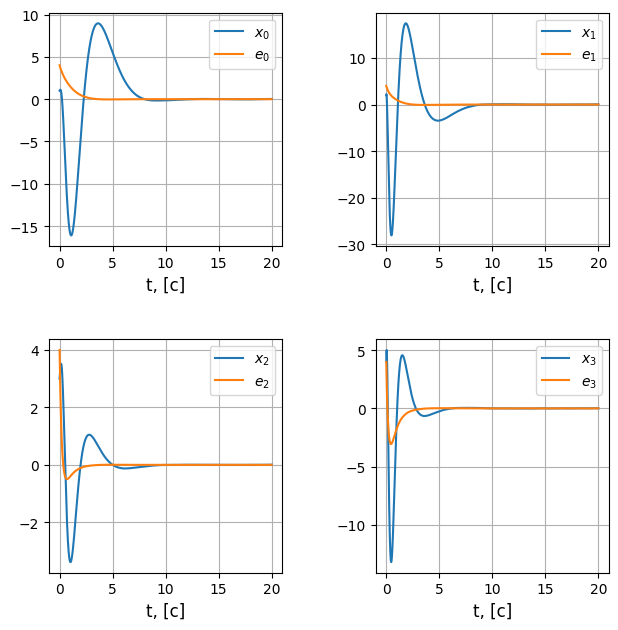

In [ ]:
std_q, std_r = [0.01] * 4, [0.01] * 2
L = -generate_Kalman(A, C, std_q, std_r)
print(f'\[Q = {std_q[0]}; R = {std_r[0]}; L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[spec(A+LC) = {a2l.to_ltx(np.linalg.eigvals(A + L @ C), print_out=False)}\]')


Q = np.diag(np.ones((A.shape[0]))) * 1
R = np.diag(np.ones((B.shape[1]))) * 1
K, S, E = control.lqr(A, B, Q, R)
K = -K
print(f'\[Q = {1}; R = {1}; K= {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[spec(A + BK) = {a2l.to_ltx(E, print_out=False)}\]')

new_A = np.block([[A + B @ K, -B @ K], [np.zeros((A.shape[0], K.shape[1] * 2 - C.shape[1])), A + L @ C]])
new_B = np.block([[np.diag([1] * 4), np.zeros((4, 2))], [np.diag([1] * 4), L]])

ts = get_t(20)

f, xi = np.random.normal(0, std_q, (len(ts), 4)), np.random.normal(0, std_r, (len(ts), 2))
u = np.hstack([f, xi])
ss = control.ss(new_A, new_B, 0 * new_A, 0 * new_B)
resp = control.forced_response(ss, T=ts, U=u.T, X0=np.array([1, 2, 3, 4, 4, 4, 4, 4]))

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for i, state in enumerate(resp.states[:4]):
        axs[i//2, i%2].plot(ts, state, label=f'$ x_{i} $') 
        axs[i//2, i%2].plot(ts, resp.states[4 + i], label=f'$ e_{i} $') 

for i in range(4):
    axs[i//2, i%2].set_xlabel(f"t, [c]", fontsize=12)
#     axs[i//2, i%2].set_title(f"$x_{i} = x_{i}(t)$", fontsize=12)
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].legend()
plt.savefig(f'{SAVE_PATH}/task5_LQG_lin.jpg')

5.5

In [ ]:
def up_func_LQG(t, x, u, params):
    ''' 
    x[:4] --  x
    x[4:] --  \hat{x}
    u -- trash
    '''
    L = params.get('L', np.zeros((1, 4)))
    K = params.get('K', np.zeros((1, 4)))
    C = params.get('C', np.zeros((1, 4)))
    D = params.get('D', np.zeros((1, 4)))
    std_f = params.get('std_f', 1)
    noise = np.random.normal(0, std_f, (1, 1))
    f = (D @ noise).reshape(-1)
    
    u[0] = (K @ x[4:]).reshape(-1)[0]
    
    dxh =  np.array([
        x[4 + 1],
        1 / (M + m*np.sin(x[4 + 2])**2) * (-m*l*np.sin(x[4 + 2])*x[4 + 3]**2 + m*g*np.cos(x[4 + 2])*np.sin(x[4 + 2]) + u[0] + u[1]*np.cos(x[4 + 2])/l),
        x[4 + 3],
        1 / (M + m*np.sin(x[4 + 2])**2) * (-m*np.cos(x[4 + 2])*np.sin(x[4 + 2])*x[4 + 3]**2 + (M+m)*g*np.sin(x[4 + 2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[4 + 2])/l)
    ]) + L @ (C@x[4:] - C@x[:4])
    
    dx = np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u[0] + u[1]*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*g*u[1]/(m*l**2) + u[0]*np.cos(x[2])/l)
    ]) + f
    
    return np.hstack((dx, dxh))


In [ ]:
x0 = np.array([0.1, 0, 0.1, 0])
std_q, std_r = [0.01] * 4, [0.01] * 2
L = -generate_Kalman(A, C, std_q, std_r)
print(f'\[Q = {std_q[0]}; R = {std_r[0]}; L = {a2l.to_ltx(L, print_out=False)}\]')
print(f'\[spec(A+LC) = {a2l.to_ltx(np.linalg.eigvals(A + L @ C), print_out=False)}\]')


Q = np.diag(np.ones((A.shape[0]))) * 1
R = np.diag(np.ones((B.shape[1]))) * 1
K, S, E = control.lqr(A, B, Q, R)
K = -K
print(f'\[Q = {1}; R = {1}; K= {a2l.to_ltx(K, print_out=False)}\]')
print(f'\[spec(A + BK) = {a2l.to_ltx(E, print_out=False)}\]')

ss_non_lin_LQG = control.NonlinearIOSystem(up_func_LQG, params={"L": L, "C": C, "D": D, "std_f": std_q[0], 'K': K})
ss_non_lin_LQG.set_inputs(2)

resp_non_lin_LQG= control.input_output_response(ss_non_lin_LQG, T=ts, X0=np.hstack((x0, x0 + 0.1)), U=np.zeros((2, len(ts))))

\[Q = 0.01; R = 0.01; L = \begin{bmatrix}
  1.76 &  0.37\\
  1.11 &  1.88\\
  0.37 &  6.69\\
  1.26 &  21.97
\end{bmatrix}\]
\[Q = 0.01; R = 0.01; L = \begin{bmatrix}
 -1.76 & -0.37\\
 -1.11 & -1.88\\
 -0.37 & -6.69\\
 -1.26 & -21.97
\end{bmatrix}\]
\[spec(A+LC) = \begin{bmatrix}
 -0.87 + 0.50j & -0.87 + -0.50j & -2.88 + 0.00j & -3.84 + 0.00j
\end{bmatrix}\]
\[Q = 1; R = 1; K= \begin{bmatrix}
  1.00 &  2.40 & -34.91 & -10.76
\end{bmatrix}\]
\[spec(A + BK) = \begin{bmatrix}
 -3.86 + 0.00j & -2.87 + 0.00j & -0.81 + 0.50j & -0.81 + -0.50j
\end{bmatrix}\]


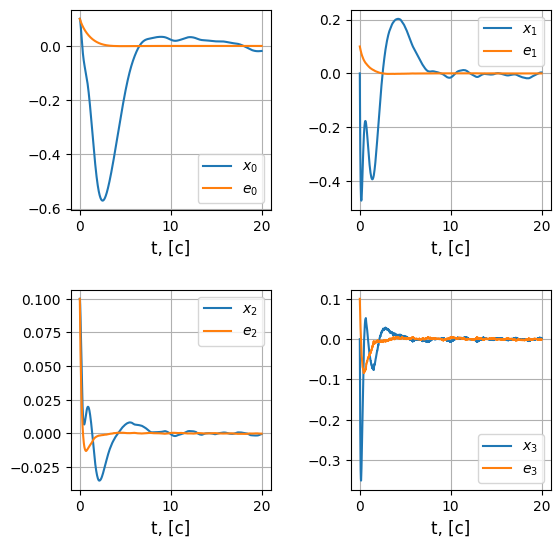

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

for i, state in enumerate(resp.states[:4]):
        axs[i//2, i%2].plot(ts, resp_non_lin_LQG.states[i], label=f'$ x_{i} $') 
        axs[i//2, i%2].plot(ts, resp_non_lin_LQG.states[i + 4] - resp_non_lin_LQG.states[i], label=f'$ e_{i} $') 

for i in range(4):
    axs[i//2, i%2].set_xlabel(f"t, [c]", fontsize=12)
#     axs[i//2, i%2].set_title(f"$x_{i} = x_{i}(t)$", fontsize=12)
    axs[i//2, i%2].grid(True)
    axs[i//2, i%2].legend()
plt.savefig(f'{SAVE_PATH}/task5_LQG_non_lin.jpg')

## task6

In [ ]:
A_1 = A

B_1 = B

B_2 = D @ (np.array([1, 2, 3, 4, 5, 6]) / 3).reshape((1,-1))
B_2 = (np.array([1, 2, 3, 4, 5, 6]) / 10).reshape((1,-1))


A_2 = np.array([
    [0, 0.1, 0, 0, 0, 0],
    [-0.1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.5],
    [0, 0, 0, 0, -0.5, 0]
])

C_1 = C

D_1 = np.array([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])

C_2 = np.array([[0, 0, 1, 0]])

D_2 = np.array([[0, 0, 0, 0, 0, 0]])

In [ ]:
print(f'\[A_1 = {a2l.to_ltx(A_1, print_out=False)}\]')
print(f'\[A_2 = {a2l.to_ltx(A_2, print_out=False)}\]')
print(f'\[B_1 = {a2l.to_ltx(B_1, print_out=False)}\]')
print(f'\[B_2 = {a2l.to_ltx(B_2, print_out=False)}\]')
print(f'\[C_2 = {a2l.to_ltx(C_2, print_out=False)}\]')
print(f'\[D_2 = {a2l.to_ltx(D_2, print_out=False)}\]')
print(f'\[C_1 = {a2l.to_ltx(C_1, print_out=False)}\]')
print(f'\[D_1 = {a2l.to_ltx(D_1, print_out=False)}\]')

\[A_1 = \begin{bmatrix}
  0.00 &  1.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  1.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  1.00\\
  0.00 &  0.00 &  11.00 &  0.00
\end{bmatrix}\]
\[A_2 = \begin{bmatrix}
  0.00 &  0.10 &  0.00 &  0.00 &  0.00 &  0.00\\
 -0.10 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  1.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -1.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.50\\
  0.00 &  0.00 &  0.00 &  0.00 & -0.50 &  0.00
\end{bmatrix}\]
\[B_1 = \begin{bmatrix}
  0.00\\
  1.00\\
  0.00\\
  1.00
\end{bmatrix}\]
\[B_2 = \begin{bmatrix}
  0.10 &  0.20 &  0.30 &  0.40 &  0.50 &  0.60
\end{bmatrix}\]
\[C_2 = \begin{bmatrix}
  0.00 &  0.00 &  1.00 &  0.00
\end{bmatrix}\]
\[D_2 = \begin{bmatrix}
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00
\end{bmatrix}\]
\[C_1 = \begin{bmatrix}
  1.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  1.00 &  0.00
\end{bmatrix}\]
\[D_1 = \begin{bmatrix}
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
 

In [ ]:
def get_control_by_state(A1, A2, B1, B2, C2, D2):
    K, S, E = control.lqr(A1, B1, 0.1 * np.eye(A1.shape[0]), np.eye(B1.shape[1]))
    K = -K
    P = cvxpy.Variable((A1.shape[0], A2.shape[0]))
    Y = cvxpy.Variable((B1.shape[1], A2.shape[0])) 
    prob = cvxpy.Problem(cvxpy.Minimize(0), [C2 @ P + D2 == 0, P @ A2 - A1 @ P == B1 @ Y + B2])
    print('Optimization error: ', prob.solve(solver=cvxpy.ECOS))
    K2 = Y.value - K @ P.value
    
    print(f'\[K_1 = {a2l.to_ltx(K, print_out=False)}\]')
    print(f'\[spec(A + B_1 K_1) = {a2l.to_ltx(E, print_out=False)}\]')
    print(f'\[K_2 = {a2l.to_ltx(K2, print_out=False)}\]')
    return K, K2, control.ss(A1 + B1@K, B2 + B1@K2, C2, D2)

In [ ]:
def up_func_comp(t, x, u, params):
    K_1 = params.get('K_1', np.zeros((1, 4)))
    K_2 = params.get('K_2', np.zeros((1, 4)))
    B_2 = params.get('B_2', np.zeros((1, 4)))
    
    w = u.copy()
    f = (B_2 @ w).reshape(-1)[0]
    u = (K_1@x + K_2@w).reshape(-1)[0]
    dx = np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u + f*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*f/(m*l**2) + u*np.cos(x[2])/l)
    ]) 
    return dx

In [ ]:
ts = get_t(30)
w_ss = control.ss(A_2, np.zeros_like(A_2), np.zeros_like(A_2), np.zeros_like(A_2))
ws = control.forced_response(w_ss, X0=[0.04, 0.01, 0.02, 0.03, 0.05, 0.06], T=ts).states
K1, K2, ss = get_control_by_state(A_1, A_2, B_1, B_2, C_2, D_2)

non_lin_sys_comp = control.NonlinearIOSystem(up_func_comp, params={'K_1': K1, 'K_2': K2, 'B_2': B_2})
non_lin_sys_comp.set_inputs(6)

x0 = [0.1, 0, 0.5, 0]
resp = control.forced_response(ss, T=ts, X0=x0, U=ws)
resp_non_lin = control.input_output_response(non_lin_sys_comp, T=ts, X0=x0, U=ws)

Optimization error:  0.0
\[K_1 = \begin{bmatrix}
  0.32 &  1.08 & -28.01 & -8.54
\end{bmatrix}\]
\[spec(A + B_1 K_1) = \begin{bmatrix}
 -3.47 + 0.00j & -3.17 + 0.00j & -0.41 + 0.35j & -0.41 + -0.35j
\end{bmatrix}\]
\[K_2 = \begin{bmatrix}
 -0.83 & -1.70 & -2.14 & -3.68 & -3.93 & -5.32
\end{bmatrix}\]


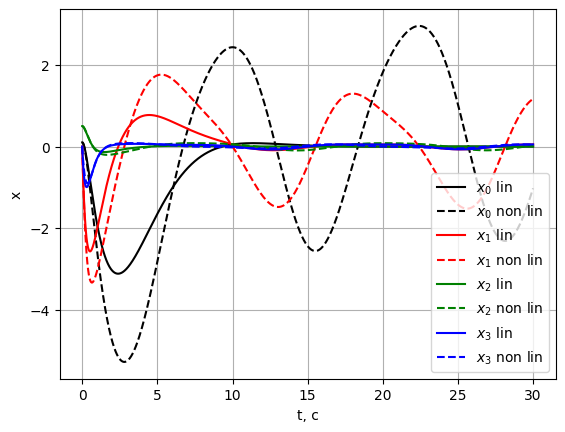

In [ ]:
colors = ['k', 'r', 'g', 'b']
for i in range(A_1.shape[0]):
    plt.plot(ts, resp.states[i], color=colors[i], label=f'$x_{i}$ lin')
    plt.plot(ts, resp_non_lin.states[i], '--', color=colors[i], label=f'$x_{i}$ non lin')
plt.xlabel('t, c')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.savefig(f'{SAVE_PATH}/task6_1_states.jpg')
plt.show()

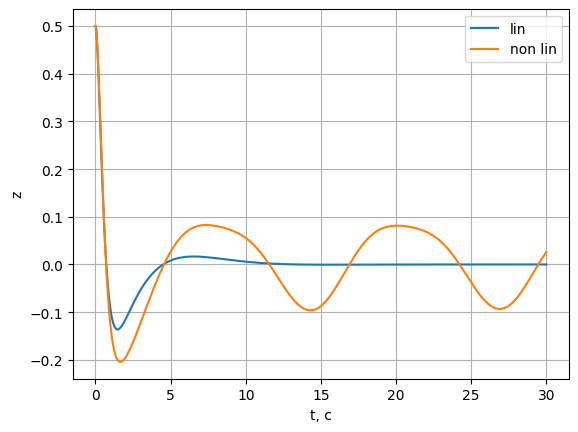

In [ ]:
plt.plot(ts, resp.outputs[0], label='lin')
plt.plot(ts, (C_2 @ resp_non_lin.states).reshape(-1), label='non lin')

plt.xlabel('t, c')
plt.ylabel('z')
plt.legend()
plt.grid()
plt.savefig(f'{SAVE_PATH}/task6_1_z.jpg')

6.2

In [ ]:
B_2 = np.zeros((4, 6))
D_2 = np.array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

In [ ]:
print(f'\[A_1 = {a2l.to_ltx(A_1, print_out=False)}\]')
print(f'\[A_2 = {a2l.to_ltx(A_2, print_out=False)}\]')
print(f'\[B_1 = {a2l.to_ltx(B_1, print_out=False)}\]')
print(f'\[B_1 = {a2l.to_ltx(B_2, print_out=False)}\]')
print(f'\[C_2 = {a2l.to_ltx(C_2, print_out=False)}\]')
print(f'\[D_2 = {a2l.to_ltx(D_2, print_out=False)}\]')

\[A_1 = \begin{bmatrix}
  0.00 &  1.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  1.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  1.00\\
  0.00 &  0.00 &  11.00 &  0.00
\end{bmatrix}\]
\[A_2 = \begin{bmatrix}
  0.00 &  0.10 &  0.00 &  0.00 &  0.00 &  0.00\\
 -0.10 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  1.00 &  0.00 &  0.00\\
  0.00 &  0.00 & -1.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.50\\
  0.00 &  0.00 &  0.00 &  0.00 & -0.50 &  0.00
\end{bmatrix}\]
\[B_1 = \begin{bmatrix}
  0.00\\
  1.00\\
  0.00\\
  1.00
\end{bmatrix}\]
\[B_1 = \begin{bmatrix}
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00\\
  0.00 &  0.00 &  0.00 &  0.00 &  0.00 &  0.00
\end{bmatrix}\]
\[C_2 = \begin{bmatrix}
  0.00 &  0.00 &  1.00 &  0.00
\end{bmatrix}\]
\[D_2 = \begin{bmatrix}
  0.10 &  0.10 &  0.10 &  0.10 &  0.10 &  0.10
\end{bmatrix}\]


In [ ]:
def up_func_track(t, x, u, params):
    K_1 = params.get('K_1', np.zeros((1, 4)))
    K_2 = params.get('K_2', np.zeros((1, 4)))
    w = u.copy()
    f = 0
    u = (K_1@x + K_2@w).reshape(-1)[0]
    dx = np.array([
        x[1],
        1 / (M + m*np.sin(x[2])**2) * (-m*l*np.sin(x[2])*x[3]**2 + m*g*np.cos(x[2])*np.sin(x[2]) + u + f*np.cos(x[2])/l),
        x[3],
        1 / (M + m*np.sin(x[2])**2) * (-m*np.cos(x[2])*np.sin(x[2])*x[3]**2 + (M+m)*g*np.sin(x[2])/l + (M+m)*f/(m*l**2) + u*np.cos(x[2])/l)
    ]) 
    return dx

In [ ]:
ts = get_t(60)
w_ss = control.ss(A_2, np.zeros_like(A_2), np.zeros_like(A_2), np.zeros_like(A_2))
ws = control.forced_response(w_ss, X0=[0.04, 0.01, 0.02, 0.03, 0.05, 0.06], T=ts).states
K1, K2, ss = get_control_by_state(A_1, A_2, B_1, B_2, C_2, D_2)

non_lin_sys_comp = control.NonlinearIOSystem(up_func_track, params={'K_1': K1, 'K_2': K2})
non_lin_sys_comp.set_inputs(6)

x0 = [0.1, 0, 0.5, 0]
resp = control.forced_response(ss, T=ts, X0=x0, U=ws)
resp_non_lin = control.input_output_response(non_lin_sys_comp, T=ts, X0=x0, U=ws)

Optimization error:  0.0
\[K_1 = \begin{bmatrix}
  0.32 &  1.08 & -28.01 & -8.54
\end{bmatrix}\]
\[spec(A + B_1 K_1) = \begin{bmatrix}
 -3.47 + 0.00j & -3.17 + 0.00j & -0.41 + 0.35j & -0.41 + -0.35j
\end{bmatrix}\]
\[K_2 = \begin{bmatrix}
  19.19 &  40.72 & -1.59 & -0.91 & -2.17 &  1.42
\end{bmatrix}\]


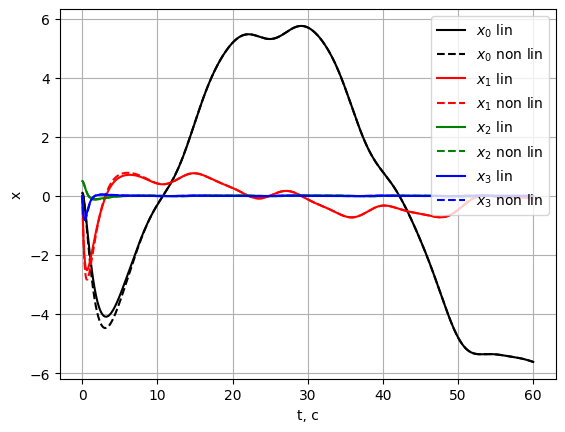

In [ ]:
colors = ['k', 'r', 'g', 'b']
for i in range(A_1.shape[0]):
    plt.plot(ts, resp.states[i], color=colors[i], label=f'$x_{i}$ lin')
    plt.plot(ts, resp_non_lin.states[i], '--', color=colors[i], label=f'$x_{i}$ non lin')
plt.xlabel('t, c')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.savefig(f'{SAVE_PATH}/task6_2_states.jpg')
plt.show()

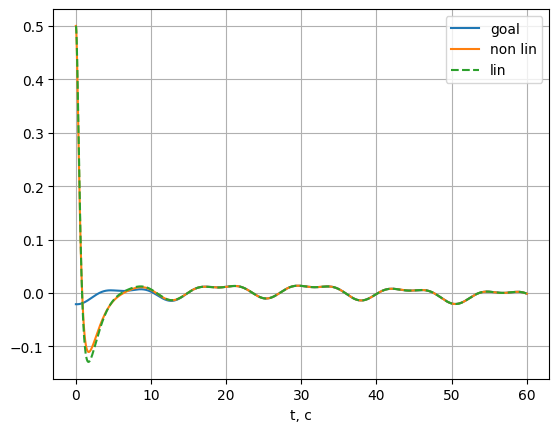

In [ ]:
plt.plot(ts, -(D_2@ws)[0], label="goal")
plt.plot(ts, resp.states[2], label="non lin")
plt.plot(ts, resp_non_lin.states[2], "--", label="lin")

plt.xlabel('t, c')
plt.legend()
plt.grid()
plt.savefig(f'{SAVE_PATH}/task6_2_target.jpg')
